## 바른 학습을 위해
- 오버피팅 방지하는 다양한 방법

In [6]:
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

In [5]:
# 데이터 로드하기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

In [3]:
# weight decay（가중치 감쇠） 설정
#weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1

In [4]:
network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

In [8]:
max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

epoch마다 train acc와 test acc 확인

In [9]:
for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

epoch:0, train acc:0.09, test acc:0.1032
epoch:1, train acc:0.09666666666666666, test acc:0.1038
epoch:2, train acc:0.09333333333333334, test acc:0.1052
epoch:3, train acc:0.10333333333333333, test acc:0.11
epoch:4, train acc:0.10333333333333333, test acc:0.1136
epoch:5, train acc:0.11, test acc:0.1154
epoch:6, train acc:0.11666666666666667, test acc:0.121
epoch:7, train acc:0.15333333333333332, test acc:0.1285
epoch:8, train acc:0.15666666666666668, test acc:0.1361
epoch:9, train acc:0.17, test acc:0.1402
epoch:10, train acc:0.2, test acc:0.1572
epoch:11, train acc:0.21333333333333335, test acc:0.165
epoch:12, train acc:0.25666666666666665, test acc:0.1903
epoch:13, train acc:0.2866666666666667, test acc:0.2089
epoch:14, train acc:0.31666666666666665, test acc:0.2305
epoch:15, train acc:0.33666666666666667, test acc:0.2481
epoch:16, train acc:0.3433333333333333, test acc:0.2492
epoch:17, train acc:0.36666666666666664, test acc:0.2649
epoch:18, train acc:0.3933333333333333, test acc:0.

epoch:160, train acc:0.86, test acc:0.7175
epoch:161, train acc:0.86, test acc:0.7119
epoch:162, train acc:0.85, test acc:0.7002
epoch:163, train acc:0.8433333333333334, test acc:0.6957
epoch:164, train acc:0.8533333333333334, test acc:0.7033
epoch:165, train acc:0.8566666666666667, test acc:0.7083
epoch:166, train acc:0.8466666666666667, test acc:0.7058
epoch:167, train acc:0.8566666666666667, test acc:0.7111
epoch:168, train acc:0.8533333333333334, test acc:0.7062
epoch:169, train acc:0.85, test acc:0.7024
epoch:170, train acc:0.8533333333333334, test acc:0.7052
epoch:171, train acc:0.84, test acc:0.7006
epoch:172, train acc:0.85, test acc:0.708
epoch:173, train acc:0.8466666666666667, test acc:0.7057
epoch:174, train acc:0.8533333333333334, test acc:0.7133
epoch:175, train acc:0.8433333333333334, test acc:0.702
epoch:176, train acc:0.8533333333333334, test acc:0.7088
epoch:177, train acc:0.8533333333333334, test acc:0.7119
epoch:178, train acc:0.8566666666666667, test acc:0.7089
epo

그래프로 표현하기

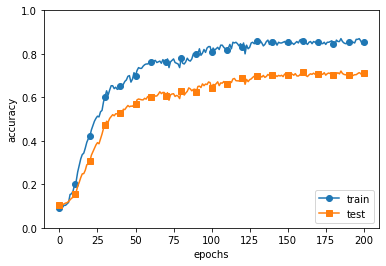

In [10]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### 가중치 감소로 오버피팅 억제하기

In [8]:
# 데이터 로드하기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

In [9]:
# weight decay（가중치 감쇠） 설정
weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우

In [10]:
network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

In [11]:
max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

In [12]:
for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

epoch:0, train acc:0.10333333333333333, test acc:0.0976
epoch:1, train acc:0.11, test acc:0.1004
epoch:2, train acc:0.12666666666666668, test acc:0.1083
epoch:3, train acc:0.14333333333333334, test acc:0.1145
epoch:4, train acc:0.14333333333333334, test acc:0.1208
epoch:5, train acc:0.16333333333333333, test acc:0.1288
epoch:6, train acc:0.18666666666666668, test acc:0.1333
epoch:7, train acc:0.2, test acc:0.1484
epoch:8, train acc:0.22, test acc:0.1549
epoch:9, train acc:0.21666666666666667, test acc:0.1745
epoch:10, train acc:0.23333333333333334, test acc:0.1817


KeyboardInterrupt: 

In [ ]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

- 가중치 감쇠 0.1을 주지 않으면 train acc가 0.99 넘게 오버피팅이 발생
- 가중치 감쇠 0.2 적용 시, 학습이 제대로 되지 않는 모습 적절한 가중치 감쇠 필요

In [17]:
# weight decay（가중치 감쇠） 설정
weight_decay_lambda = 0.2 # weight decay를 사용하지 않을 경우

In [18]:
network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

In [19]:
max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

In [20]:
for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

epoch:0, train acc:0.11666666666666667, test acc:0.1014
epoch:1, train acc:0.12333333333333334, test acc:0.1047
epoch:2, train acc:0.13666666666666666, test acc:0.1114
epoch:3, train acc:0.14666666666666667, test acc:0.1208
epoch:4, train acc:0.17666666666666667, test acc:0.1482
epoch:5, train acc:0.2, test acc:0.1734
epoch:6, train acc:0.23, test acc:0.1849
epoch:7, train acc:0.25, test acc:0.193
epoch:8, train acc:0.27, test acc:0.2128
epoch:9, train acc:0.31333333333333335, test acc:0.2432
epoch:10, train acc:0.3566666666666667, test acc:0.2786
epoch:11, train acc:0.36666666666666664, test acc:0.2865
epoch:12, train acc:0.42333333333333334, test acc:0.3194
epoch:13, train acc:0.4166666666666667, test acc:0.3182
epoch:14, train acc:0.42333333333333334, test acc:0.3364
epoch:15, train acc:0.46, test acc:0.3526
epoch:16, train acc:0.4766666666666667, test acc:0.3656
epoch:17, train acc:0.4866666666666667, test acc:0.3824
epoch:18, train acc:0.49333333333333335, test acc:0.3924
epoch:19

epoch:157, train acc:0.3933333333333333, test acc:0.3313
epoch:158, train acc:0.3933333333333333, test acc:0.3265
epoch:159, train acc:0.38666666666666666, test acc:0.3222
epoch:160, train acc:0.37666666666666665, test acc:0.3194
epoch:161, train acc:0.37666666666666665, test acc:0.3168
epoch:162, train acc:0.38, test acc:0.3179
epoch:163, train acc:0.37666666666666665, test acc:0.3168
epoch:164, train acc:0.37666666666666665, test acc:0.3149
epoch:165, train acc:0.36666666666666664, test acc:0.3121
epoch:166, train acc:0.36, test acc:0.3056
epoch:167, train acc:0.35333333333333333, test acc:0.2993
epoch:168, train acc:0.3433333333333333, test acc:0.2942
epoch:169, train acc:0.33666666666666667, test acc:0.2907
epoch:170, train acc:0.32666666666666666, test acc:0.2834
epoch:171, train acc:0.33, test acc:0.2809
epoch:172, train acc:0.32666666666666666, test acc:0.28
epoch:173, train acc:0.32666666666666666, test acc:0.2793
epoch:174, train acc:0.32666666666666666, test acc:0.2771
epoch:

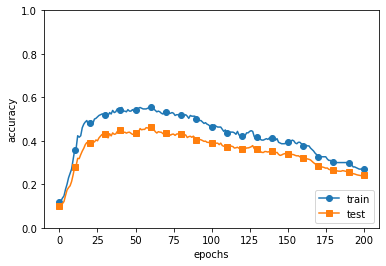

In [21]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### 드롭아웃으로 오버피팅 억제하기

In [13]:
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

In [14]:
# 데이터 로드
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 줄이기
x_train = x_train[:300]
t_train = t_train[:300]

In [15]:
# 드롭아웃 사용 유무와 비율 설정
use_dropout = True  # 드롭아웃 사용여부
dropout_ratio = 0.2

In [16]:
# 학습진행
network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

train loss:2.306466211116495
=== epoch:1, train acc:0.08333333333333333, test acc:0.0935 ===
train loss:2.3233742007586047
train loss:2.316996688370058
train loss:2.3128754499657806
=== epoch:2, train acc:0.1, test acc:0.101 ===
train loss:2.305261699158031
train loss:2.323233781629496
train loss:2.322380959380987
=== epoch:3, train acc:0.10666666666666667, test acc:0.1037 ===
train loss:2.3299841311425937
train loss:2.2944871777306837
train loss:2.313756615900901
=== epoch:4, train acc:0.10333333333333333, test acc:0.1087 ===
train loss:2.3115197446062776
train loss:2.3146947128784494
train loss:2.2915479274684913
=== epoch:5, train acc:0.12, test acc:0.1127 ===
train loss:2.3060189595239247
train loss:2.3060533806881014
train loss:2.3087166566969675
=== epoch:6, train acc:0.11, test acc:0.1165 ===
train loss:2.300769070790303
train loss:2.307209865920115
train loss:2.290991967723541
=== epoch:7, train acc:0.11666666666666667, test acc:0.1241 ===
train loss:2.3042449149116804
train lo

=== epoch:56, train acc:0.29333333333333333, test acc:0.2372 ===
train loss:2.2043457542969236
train loss:2.190724808082194
train loss:2.12176917575993
=== epoch:57, train acc:0.29, test acc:0.235 ===
train loss:2.201563117509279
train loss:2.21408780497264
train loss:2.156440709260063
=== epoch:58, train acc:0.2966666666666667, test acc:0.236 ===
train loss:2.185494282222665
train loss:2.179938471891265
train loss:2.1669958492015713
=== epoch:59, train acc:0.30333333333333334, test acc:0.2393 ===
train loss:2.155080301619888
train loss:2.214972568723867
train loss:2.1924286573298772
=== epoch:60, train acc:0.30333333333333334, test acc:0.2384 ===
train loss:2.1954490380953584
train loss:2.1917199165158703
train loss:2.135285917841273
=== epoch:61, train acc:0.3, test acc:0.2344 ===
train loss:2.1374873671940895
train loss:2.1712117660836183
train loss:2.157337407301946
=== epoch:62, train acc:0.30333333333333334, test acc:0.2358 ===
train loss:2.197214408911791
train loss:2.1340088662

=== epoch:111, train acc:0.37333333333333335, test acc:0.303 ===
train loss:1.863452083852164
train loss:1.937497807885072
train loss:1.969950842592458
=== epoch:112, train acc:0.37, test acc:0.3027 ===
train loss:1.9049242890656959
train loss:2.017450237110186
train loss:1.835137259118409
=== epoch:113, train acc:0.37333333333333335, test acc:0.306 ===
train loss:1.9738056651486022
train loss:1.9669826390060792
train loss:1.9638809475322234
=== epoch:114, train acc:0.37333333333333335, test acc:0.3074 ===
train loss:1.947992724339209
train loss:1.9648766440084484
train loss:1.9905953751590344
=== epoch:115, train acc:0.38666666666666666, test acc:0.3137 ===
train loss:2.073229472587781
train loss:2.001055140157013
train loss:1.883459914052046
=== epoch:116, train acc:0.4, test acc:0.3175 ===
train loss:1.9715764168907208
train loss:1.9532246361397336
train loss:2.0137251617989946
=== epoch:117, train acc:0.4033333333333333, test acc:0.3217 ===
train loss:2.0072060775902303
train loss:

=== epoch:166, train acc:0.49666666666666665, test acc:0.4022 ===
train loss:1.601684135433723
train loss:1.7534902978161329
train loss:1.6689916438129972
=== epoch:167, train acc:0.49666666666666665, test acc:0.4021 ===
train loss:1.767247388982888
train loss:1.7652262820605011
train loss:1.7727762141998011
=== epoch:168, train acc:0.51, test acc:0.4072 ===
train loss:1.6497015887287703
train loss:1.8147428397102647
train loss:1.7310005145524383
=== epoch:169, train acc:0.51, test acc:0.4066 ===
train loss:1.7079196307432756
train loss:1.7113215901791798
train loss:1.7317891399700982
=== epoch:170, train acc:0.5133333333333333, test acc:0.4084 ===
train loss:1.790786745746264
train loss:1.8151818308201715
train loss:1.7186703009842716
=== epoch:171, train acc:0.5233333333333333, test acc:0.4118 ===
train loss:1.6778716516976533
train loss:1.768381609365936
train loss:1.6891317476807217
=== epoch:172, train acc:0.53, test acc:0.4156 ===
train loss:1.6391650514771285
train loss:1.675129

=== epoch:222, train acc:0.62, test acc:0.4851 ===
train loss:1.4183465324123992
train loss:1.4545543974882411
train loss:1.4115579966448637
=== epoch:223, train acc:0.6233333333333333, test acc:0.4878 ===
train loss:1.4117753910437292
train loss:1.3873947336072212
train loss:1.3675283135712375
=== epoch:224, train acc:0.6233333333333333, test acc:0.488 ===
train loss:1.5479985881799125
train loss:1.3541978959952385
train loss:1.4034139705617479
=== epoch:225, train acc:0.6233333333333333, test acc:0.4891 ===
train loss:1.440403018738745
train loss:1.4764444387355564
train loss:1.4887438322602093
=== epoch:226, train acc:0.62, test acc:0.4899 ===
train loss:1.4090230323535555
train loss:1.562307415010366
train loss:1.4496912061393403
=== epoch:227, train acc:0.6166666666666667, test acc:0.4912 ===
train loss:1.4117036891269574
train loss:1.4017382236684954
train loss:1.4830368223933297
=== epoch:228, train acc:0.62, test acc:0.4902 ===
train loss:1.3148115400546394
train loss:1.2912160

=== epoch:278, train acc:0.6666666666666666, test acc:0.5486 ===
train loss:1.0874193582387206
train loss:1.0418094114709664
train loss:1.0120216389474441
=== epoch:279, train acc:0.6733333333333333, test acc:0.5512 ===
train loss:1.0568060210001897
train loss:1.1224952015772531
train loss:1.1263569077099056
=== epoch:280, train acc:0.67, test acc:0.5542 ===
train loss:0.98461136874101
train loss:1.1920972859060037
train loss:1.1785947116287852
=== epoch:281, train acc:0.6733333333333333, test acc:0.5558 ===
train loss:1.084859618396277
train loss:0.9360729176722776
train loss:1.181873792830452
=== epoch:282, train acc:0.6733333333333333, test acc:0.5555 ===
train loss:0.9529161696389034
train loss:1.076630310748851
train loss:1.08050008463593
=== epoch:283, train acc:0.67, test acc:0.5559 ===
train loss:1.0963873432347955
train loss:1.2305915423633498
train loss:1.0654327781361803
=== epoch:284, train acc:0.6733333333333333, test acc:0.5549 ===
train loss:1.17976571224707
train loss:1

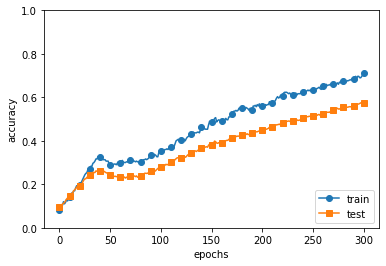

In [17]:
# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

드롭아웃 비율 조정해보기

In [20]:
# 드롭아웃 사용 유무와 비율 설정
use_dropout = True  # 드롭아웃 사용여부
dropout_ratio = 0.1

# 학습진행
network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

train loss:2.3314751181089512
=== epoch:1, train acc:0.08666666666666667, test acc:0.1034 ===
train loss:2.3393209350684536
train loss:2.316973392017008
train loss:2.320330647975749
=== epoch:2, train acc:0.09, test acc:0.1054 ===
train loss:2.3096688153665212
train loss:2.315644790181693
train loss:2.3051668297623507
=== epoch:3, train acc:0.07666666666666666, test acc:0.1104 ===
train loss:2.3121373355348935
train loss:2.3000943990132647
train loss:2.2679346128534514
=== epoch:4, train acc:0.08666666666666667, test acc:0.1112 ===
train loss:2.2790382893603276
train loss:2.2800470053793895
train loss:2.3197652621345344
=== epoch:5, train acc:0.09666666666666666, test acc:0.1157 ===
train loss:2.2760483068444675
train loss:2.3182318850256776
train loss:2.3084666431057097
=== epoch:6, train acc:0.10333333333333333, test acc:0.118 ===
train loss:2.2794577794697
train loss:2.294928824587181
train loss:2.2701767258192604
=== epoch:7, train acc:0.10333333333333333, test acc:0.1219 ===
train

=== epoch:57, train acc:0.5566666666666666, test acc:0.4157 ===
train loss:1.9721562038951685
train loss:1.9831237895919558
train loss:1.9249488649550446
=== epoch:58, train acc:0.5666666666666667, test acc:0.4169 ===
train loss:1.9987866740320683
train loss:1.929361675205635
train loss:2.000839817672491
=== epoch:59, train acc:0.5833333333333334, test acc:0.4346 ===
train loss:1.973932005282387
train loss:1.9374767791678238
train loss:1.8406987348124373
=== epoch:60, train acc:0.58, test acc:0.439 ===
train loss:2.000701086821687
train loss:1.8417411838556945
train loss:1.8541279760966933
=== epoch:61, train acc:0.5833333333333334, test acc:0.4464 ===
train loss:1.9125640679186355
train loss:1.950086794273136
train loss:1.9126243624838575
=== epoch:62, train acc:0.5933333333333334, test acc:0.4487 ===
train loss:1.9855500172449785
train loss:1.8776971627603078
train loss:2.0099015276676626
=== epoch:63, train acc:0.5966666666666667, test acc:0.4552 ===
train loss:1.8876429114634632
tr

=== epoch:112, train acc:0.7766666666666666, test acc:0.6251 ===
train loss:1.0890030922829073
train loss:1.0035228391521682
train loss:0.9110133998514475
=== epoch:113, train acc:0.7833333333333333, test acc:0.6251 ===
train loss:1.0500320898645155
train loss:0.9052904373140686
train loss:0.9918238062995709
=== epoch:114, train acc:0.7866666666666666, test acc:0.6286 ===
train loss:1.0058597085337555
train loss:0.9719382211748507
train loss:0.8695512975452963
=== epoch:115, train acc:0.7933333333333333, test acc:0.6323 ===
train loss:0.937137262392272
train loss:0.962628665529667
train loss:0.9420410394762888
=== epoch:116, train acc:0.7933333333333333, test acc:0.6335 ===
train loss:0.9139496799634164
train loss:0.9841397565505181
train loss:0.893294135343492
=== epoch:117, train acc:0.8, test acc:0.6352 ===
train loss:0.8902889073956183
train loss:0.8583793642647641
train loss:1.0255823885991873
=== epoch:118, train acc:0.7966666666666666, test acc:0.6363 ===
train loss:0.8937293306

=== epoch:167, train acc:0.8766666666666667, test acc:0.7051 ===
train loss:0.3562913190380809
train loss:0.44151522590917547
train loss:0.524248096218429
=== epoch:168, train acc:0.8766666666666667, test acc:0.7032 ===
train loss:0.4566745931973897
train loss:0.5046605454591169
train loss:0.327084520129558
=== epoch:169, train acc:0.8833333333333333, test acc:0.7055 ===
train loss:0.4514508852399375
train loss:0.42001646791621206
train loss:0.3251089408047702
=== epoch:170, train acc:0.88, test acc:0.7028 ===
train loss:0.4210808354792249
train loss:0.30821991259147974
train loss:0.37709539835732925
=== epoch:171, train acc:0.8833333333333333, test acc:0.707 ===
train loss:0.32386604128962626
train loss:0.4318487394349312
train loss:0.3518430207159878
=== epoch:172, train acc:0.8933333333333333, test acc:0.707 ===
train loss:0.448123243288776
train loss:0.4003471315834391
train loss:0.45217807954375333
=== epoch:173, train acc:0.89, test acc:0.7118 ===
train loss:0.43224531604201916
t

=== epoch:221, train acc:0.95, test acc:0.7436 ===
train loss:0.2271276964277159
train loss:0.18655909850646868
train loss:0.23835464321562724
=== epoch:222, train acc:0.9533333333333334, test acc:0.7459 ===
train loss:0.17816765786780828
train loss:0.1947044701511259
train loss:0.19624099282561439
=== epoch:223, train acc:0.96, test acc:0.7466 ===
train loss:0.21858868642913012
train loss:0.15983837995678646
train loss:0.17408571338961681
=== epoch:224, train acc:0.96, test acc:0.7467 ===
train loss:0.13903908868145978
train loss:0.24917512807371453
train loss:0.14552743883821867
=== epoch:225, train acc:0.96, test acc:0.7426 ===
train loss:0.20348761741265448
train loss:0.24980619701078915
train loss:0.15982454720589184
=== epoch:226, train acc:0.95, test acc:0.7421 ===
train loss:0.2426850875297005
train loss:0.20134773976706338
train loss:0.21605980760554658
=== epoch:227, train acc:0.95, test acc:0.7449 ===
train loss:0.14406161120697403
train loss:0.2260123021769342
train loss:0.

=== epoch:275, train acc:0.9766666666666667, test acc:0.7672 ===
train loss:0.06369305613702442
train loss:0.05001647875081544
train loss:0.11458420227072402
=== epoch:276, train acc:0.9766666666666667, test acc:0.7669 ===
train loss:0.07236331187954331
train loss:0.13737500289632398
train loss:0.11724276418711643
=== epoch:277, train acc:0.9833333333333333, test acc:0.769 ===
train loss:0.09473087589056853
train loss:0.09456787329578048
train loss:0.09085356604693154
=== epoch:278, train acc:0.98, test acc:0.7664 ===
train loss:0.08779360451016645
train loss:0.058643266613138255
train loss:0.13507327073429543
=== epoch:279, train acc:0.9833333333333333, test acc:0.7676 ===
train loss:0.10608131389104056
train loss:0.11740214211224907
train loss:0.07551924787853667
=== epoch:280, train acc:0.9833333333333333, test acc:0.7666 ===
train loss:0.06539642731794604
train loss:0.07028589425900271
train loss:0.06739836360786086
=== epoch:281, train acc:0.9833333333333333, test acc:0.7691 ===
t

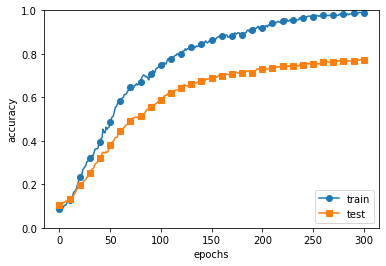

In [21]:
# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [22]:
# 드롭아웃 사용 유무와 비율 설정
use_dropout = True  # 드롭아웃 사용여부
dropout_ratio = 0.3

# 학습진행
network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

train loss:2.2959210647840487
=== epoch:1, train acc:0.06, test acc:0.0634 ===
train loss:2.310403273288428
train loss:2.309717111159578
train loss:2.301306025939381
=== epoch:2, train acc:0.06333333333333334, test acc:0.0656 ===
train loss:2.3171689045428097
train loss:2.3135769199630234
train loss:2.2903067130252794
=== epoch:3, train acc:0.06333333333333334, test acc:0.0672 ===
train loss:2.301512804903795
train loss:2.2937438779694914
train loss:2.301702891448014
=== epoch:4, train acc:0.06333333333333334, test acc:0.0664 ===
train loss:2.303317523288316
train loss:2.3028910463682273
train loss:2.303676819906938
=== epoch:5, train acc:0.06333333333333334, test acc:0.0681 ===
train loss:2.302550624868801
train loss:2.295723532825746
train loss:2.2982014673736275
=== epoch:6, train acc:0.06666666666666667, test acc:0.0702 ===
train loss:2.313798894624564
train loss:2.294495453289609
train loss:2.3117153786873157
=== epoch:7, train acc:0.06666666666666667, test acc:0.0705 ===
train lo

=== epoch:57, train acc:0.16666666666666666, test acc:0.1487 ===
train loss:2.275802165070892
train loss:2.2908857977089156
train loss:2.282374887941925
=== epoch:58, train acc:0.16666666666666666, test acc:0.1504 ===
train loss:2.28095827052158
train loss:2.2838101412891327
train loss:2.2872185115216284
=== epoch:59, train acc:0.17, test acc:0.1509 ===
train loss:2.2835653945951195
train loss:2.2882847893987885
train loss:2.2880837724992116
=== epoch:60, train acc:0.17, test acc:0.153 ===
train loss:2.290100123577364
train loss:2.298242782627925
train loss:2.282750116603335
=== epoch:61, train acc:0.17666666666666667, test acc:0.154 ===
train loss:2.273254988776885
train loss:2.289447676031024
train loss:2.272374007568524
=== epoch:62, train acc:0.18333333333333332, test acc:0.155 ===
train loss:2.2777473972999065
train loss:2.2811134262066592
train loss:2.2894144816969946
=== epoch:63, train acc:0.18333333333333332, test acc:0.1569 ===
train loss:2.27637160495262
train loss:2.2786658

=== epoch:112, train acc:0.26, test acc:0.2085 ===
train loss:2.2664576342005547
train loss:2.2732535096466795
train loss:2.2805065228008146
=== epoch:113, train acc:0.26, test acc:0.2072 ===
train loss:2.270181451612015
train loss:2.2797767795929746
train loss:2.283542753412449
=== epoch:114, train acc:0.26, test acc:0.2042 ===
train loss:2.2579051333159064
train loss:2.269565854533451
train loss:2.2720326974688665
=== epoch:115, train acc:0.27, test acc:0.2085 ===
train loss:2.2741719094540156
train loss:2.260937989114373
train loss:2.2611318285312483
=== epoch:116, train acc:0.27, test acc:0.2065 ===
train loss:2.2634293011664868
train loss:2.2683154190393706
train loss:2.2811963287383064
=== epoch:117, train acc:0.27, test acc:0.2079 ===
train loss:2.2694424909744826
train loss:2.270139572556597
train loss:2.2733723956824
=== epoch:118, train acc:0.27666666666666667, test acc:0.2103 ===
train loss:2.2538283318262495
train loss:2.282233938934948
train loss:2.2674222565447724
=== epo

=== epoch:167, train acc:0.2966666666666667, test acc:0.2365 ===
train loss:2.247177852916477
train loss:2.250514509452909
train loss:2.2662390343007046
=== epoch:168, train acc:0.3, test acc:0.2375 ===
train loss:2.2408003838936725
train loss:2.2679051884480512
train loss:2.25304461304386
=== epoch:169, train acc:0.3, test acc:0.2381 ===
train loss:2.250572605879545
train loss:2.252017296224897
train loss:2.2675784711634517
=== epoch:170, train acc:0.3, test acc:0.2368 ===
train loss:2.2517256296095343
train loss:2.2583545552683124
train loss:2.258025790661401
=== epoch:171, train acc:0.3, test acc:0.2375 ===
train loss:2.265808194790244
train loss:2.235275606123382
train loss:2.2436325115730553
=== epoch:172, train acc:0.30333333333333334, test acc:0.2377 ===
train loss:2.255630509275437
train loss:2.245394822558703
train loss:2.2393267758743467
=== epoch:173, train acc:0.30333333333333334, test acc:0.2382 ===
train loss:2.2454180182193286
train loss:2.2683261322933923
train loss:2.2

=== epoch:222, train acc:0.33666666666666667, test acc:0.2709 ===
train loss:2.2483869404802506
train loss:2.228156527174842
train loss:2.2431748745822304
=== epoch:223, train acc:0.3333333333333333, test acc:0.2746 ===
train loss:2.22933320883052
train loss:2.201584754788151
train loss:2.214209383602645
=== epoch:224, train acc:0.34, test acc:0.2758 ===
train loss:2.2396622384363076
train loss:2.2562664632895957
train loss:2.2280057594487364
=== epoch:225, train acc:0.3433333333333333, test acc:0.2789 ===
train loss:2.2106885384539496
train loss:2.194895450502548
train loss:2.2106966443737592
=== epoch:226, train acc:0.3433333333333333, test acc:0.2781 ===
train loss:2.1929700356995405
train loss:2.2202934599203443
train loss:2.2135324396230094
=== epoch:227, train acc:0.34, test acc:0.2745 ===
train loss:2.197237844727532
train loss:2.211765962009437
train loss:2.2001654417484797
=== epoch:228, train acc:0.34, test acc:0.2749 ===
train loss:2.215716762201063
train loss:2.216259549712

=== epoch:278, train acc:0.32666666666666666, test acc:0.2726 ===
train loss:2.159356188944273
train loss:2.1316138162506095
train loss:2.157319241245557
=== epoch:279, train acc:0.32666666666666666, test acc:0.275 ===
train loss:2.140784522611724
train loss:2.1767079996710166
train loss:2.20522659550812
=== epoch:280, train acc:0.33, test acc:0.2757 ===
train loss:2.160542601586604
train loss:2.169129854755295
train loss:2.18876984941552
=== epoch:281, train acc:0.33, test acc:0.2757 ===
train loss:2.1238397117560166
train loss:2.1649290860298267
train loss:2.223674451905357
=== epoch:282, train acc:0.33666666666666667, test acc:0.277 ===
train loss:2.1238143749490233
train loss:2.1737856148207326
train loss:2.083409322252959
=== epoch:283, train acc:0.32666666666666666, test acc:0.2739 ===
train loss:2.1836673670503775
train loss:2.1259285755679014
train loss:2.1590470822384393
=== epoch:284, train acc:0.32666666666666666, test acc:0.2742 ===
train loss:2.2101985438219445
train loss:

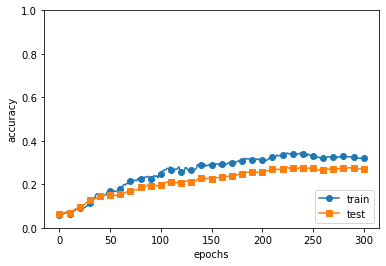

In [23]:
# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

- 드롭아웃 0.1은 오버피팅의 여지가 있고
- 드롭아웃 0.3은 학습이 저조한 경향이 있어 드롭아웃 0.2가 최적

### 적절한 하이퍼 파라미터 값 찾기
- 검증 데이터 셋 분리하기
- 적절한 하이퍼 파라미터 값 찾기

In [4]:
import numpy as np

def shuffle_dataset(x, t):
    permutation = np.random.permutation(x.shape[0])
    if x.ndim == 2:
        x = x[permutation,:]
    else:
        x = x[permutation,:,:,:]

    t = t[permutation]

    return x, t

In [5]:
# 데이터 로드하기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

데이터 뒤섞기 이전

In [6]:
t_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
# 훈련 데이터 뒤섞기

x_train,t_train = shuffle_dataset(x_train,t_train)

데이터 뒤섞기 이후

In [8]:
t_train

array([4, 4, 7, ..., 0, 3, 9], dtype=uint8)

In [9]:
# 검증셋 분리하기
valid_rate = 0.2

valid_num = int(x_train.shape[0] * valid_rate)

print(valid_num)

12000


In [10]:
x_val = x_train[:valid_num]

x_train = x_train[valid_num:]

t_val = t_train[:valid_num]

t_train = t_train[valid_num:]

In [11]:
print("훈련셋 데이터 개수 ",len(x_train))
print("검증셋 데이터 개수 ",len(t_train))

훈련셋 데이터 개수  48000
검증셋 데이터 개수  48000


In [17]:
# 학습 함수
from common.trainer import Trainer
def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list

하이퍼 파라미터 무작위 탐색

In [ ]:
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정
    weight_decay = 10 ** np.random.uniform(-8, -4) # 가중치 감소 계수의 범위 10^-8 ~ 10^-4
    lr = 10 ** np.random.uniform(-6, -2) # 학습률의 범위 10^-6 ~ 10^-2

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

val acc:0.9688333333333333 | lr:0.006736392077547212, weight decay:4.914114150355648e-08
val acc:0.852 | lr:0.00013950531508548087, weight decay:1.4081597054781761e-06
val acc:0.13966666666666666 | lr:1.4196575901750695e-06, weight decay:3.4400846846160196e-07
val acc:0.8611666666666666 | lr:0.0001339576278800374, weight decay:1.1040389848682265e-06
val acc:0.9645833333333333 | lr:0.004980197628233759, weight decay:1.1521876315210054e-06
val acc:0.9334166666666667 | lr:0.0005982720382525896, weight decay:1.1230745135054847e-08
val acc:0.22983333333333333 | lr:1.2186535925433861e-05, weight decay:4.219517995456539e-08
val acc:0.9639166666666666 | lr:0.0032902134730075075, weight decay:8.973025390127156e-05


그래프 그리기

In [ ]:
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()

### 오버피팅 방지방법 결합해보기
- 학습률 0.01
- 드롭아웃 사용
- 가중치 감쇠

In [5]:
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

In [15]:
import numpy as np

def shuffle_dataset(x, t):
    permutation = np.random.permutation(x.shape[0])
    if x.ndim == 2:
        x = x[permutation,:]
    else:
        x = x[permutation,:,:,:]

    t = t[permutation]

    return x, t

In [19]:
# 데이터 로드
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 훈련 데이터 뒤섞기

x_train,t_train = shuffle_dataset(x_train,t_train)

# 오버피팅을 재현하기 위해 학습 데이터 줄이기
x_train = x_train[:20000]
t_train = t_train[:20000]

In [ ]:
# 드롭아웃 사용 유무와 비율 설정
use_dropout = True  # 드롭아웃 사용여부
dropout_ratio = 0.2 # 드롭아웃 비율
weight_decay_lambda = 0.1 # 가중치 감쇠


# 학습진행
network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio,
                             weight_decay_lambda = weight_decay_lambda)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

train loss:62.749699836960914
=== epoch:1, train acc:0.10075, test acc:0.0959 ===
train loss:62.619500133625365
train loss:62.503274760189534
train loss:62.37773491254179
train loss:62.22631639938371
train loss:62.08647963980972
train loss:61.97214208303095
train loss:61.87386410938551
train loss:61.7508551322893
train loss:61.65773407900303
train loss:61.51865316515463
train loss:61.40421333665094
train loss:61.289777188712286
train loss:61.16796130047642
train loss:61.04114295184373
train loss:60.89780715142061
train loss:60.80962308597452
train loss:60.68572206981453
train loss:60.57038256756276
train loss:60.45005383514057
train loss:60.33935739939549
train loss:60.22445714121642
train loss:60.11089610069653
train loss:59.98531577369717
train loss:59.873912429087014
train loss:59.7561475143881
train loss:59.63824245393796
train loss:59.526596040389805
train loss:59.4051963415655
train loss:59.295675780933
train loss:59.18569490284222
train loss:59.057190171328045
train loss:58.9582

train loss:36.651083544229735
train loss:36.57653460932748
train loss:36.51174094032987
train loss:36.4474310466676
train loss:36.37616984744049
train loss:36.30841424263046
train loss:36.239798959029166
train loss:36.17216181020773
train loss:36.1007997244408
train loss:36.03582723152475
train loss:35.96676299990218
train loss:35.90534258757076
train loss:35.83675538746763
train loss:35.768261886185314
train loss:35.70219728739488
train loss:35.63243474914295
train loss:35.566290596313436
train loss:35.50246642828683
train loss:35.43458701256148
train loss:35.37182593387608
train loss:35.299876078348554
train loss:35.23181874523647
train loss:35.169449719289965
train loss:35.105077683712096
train loss:35.04397235985681
train loss:34.97473693219937
train loss:34.907940786056905
train loss:34.845891799923805
train loss:34.7806672971653
train loss:34.71487317931262
train loss:34.65074874392734
train loss:34.587591643470056
train loss:34.519631778380315
train loss:34.45908077874473
train 

train loss:13.718077820578031
train loss:13.683872343284282
train loss:13.673110806308733
train loss:13.649868121359024
train loss:13.622821550425222
train loss:13.602440851495428
train loss:13.578462622130093
train loss:13.552949419445738
train loss:13.531592896442923
train loss:13.510144768227553
train loss:13.488180617188466
train loss:13.467272677486243
train loss:13.4434374868524
train loss:13.427501443002406
train loss:13.399946702194892
train loss:13.376072766731365
train loss:13.357876601155327
train loss:13.334849323096378
train loss:13.313376512221481
train loss:13.289528477734184
train loss:13.269200451932967
train loss:13.246464491095384
train loss:13.226204412723208
train loss:13.198420086050017
train loss:13.180882411731632
train loss:13.160463599803254
train loss:13.131206976336228
train loss:13.11881278182138
train loss:13.09182847041273
train loss:13.066959559716002
train loss:13.05003159308906
train loss:13.025034862932863
train loss:13.004713027981444
train loss:12.9

train loss:8.852589060357253
train loss:8.831706487584531
train loss:8.823731235326527
train loss:8.805667059366721
train loss:8.79656154061816
train loss:8.78019260581134
train loss:8.766428879224614
train loss:8.754963367228491
train loss:8.736914022494403
train loss:8.728534913109913
train loss:8.71417286229424
train loss:8.70270035422999
train loss:8.6842455950503
train loss:8.679101392428356
train loss:8.665504707726049
train loss:8.650231085804421
train loss:8.642767053368031
train loss:8.623322640671036
train loss:8.609628081397215
train loss:8.602097484484457
train loss:8.597426892566244
train loss:8.580906825909599
train loss:8.567289751963918
train loss:8.555515344776037
train loss:8.543247590192758
train loss:8.532546531350242
train loss:8.506855933798235
train loss:8.502209345743111
train loss:8.492266181409576
train loss:8.476290576372389
train loss:8.469707998849302
train loss:8.450427156905
train loss:8.438218401765587
train loss:8.434131375412033
train loss:8.4122666210

train loss:4.411989481216278
train loss:4.409308950017884
train loss:4.419323624200198
train loss:4.403561594880346
train loss:4.399213028685331
train loss:4.399508154555748
train loss:4.392493689025842
train loss:4.387891453205306
train loss:4.3874928999928
train loss:4.380586007791448
train loss:4.378014393143074
train loss:4.374263732617671
train loss:4.368679721892127
train loss:4.368664725612019
train loss:4.351497454724864
train loss:4.356219020434672
train loss:4.352640014190239
train loss:4.347666133309712
train loss:4.333365890097764
train loss:4.342832540179881
train loss:4.334511407601141
train loss:4.324117091966537
train loss:4.329781723423162
train loss:4.320598246393048
train loss:4.317756539501805
train loss:4.319460575286518
train loss:4.3169920852904085
train loss:4.3052476707963745
train loss:4.3026260990673775
train loss:4.292492407292315
train loss:4.292795312910624
train loss:4.293159064275029
train loss:4.288030662053297
train loss:4.281640530750185
train loss:4.

train loss:3.506993961092923
train loss:3.5067376287678353
train loss:3.5043746287224122
train loss:3.4912795530009815
train loss:3.4914663359918965
train loss:3.4957455140054714
train loss:3.486279520572719
train loss:3.4823851538959234
train loss:3.4908323083949897
train loss:3.4838046740908473
train loss:3.4855271181327536
train loss:3.478600144108886
train loss:3.474794826095016
train loss:3.4688162529134683
train loss:3.478448588477434
train loss:3.4696775530554516
train loss:3.4753892852699177
train loss:3.467823497821649
train loss:3.4625357770515786
train loss:3.4672137772502745
train loss:3.4582244865072833
train loss:3.458247532016065
train loss:3.444483244649856
train loss:3.4499925453760545
train loss:3.4498370347877194
train loss:3.446343585704489
train loss:3.4379437368595975
train loss:3.4453090098280947
train loss:3.4440273100404575
train loss:3.43904543029457
train loss:3.427156069812175
train loss:3.440512430908198
train loss:3.434051835669951
train loss:3.43332337910

train loss:2.976639981448925
train loss:2.983446407161016
train loss:2.9787331173207114
train loss:2.9753600171763424
train loss:2.9782146170327275
train loss:2.9773225913761996
train loss:2.9739535523697773
train loss:2.975755909196101
train loss:2.975680424663511
train loss:2.96997395061027
train loss:2.975574895415025
train loss:2.9652328751852135
train loss:2.9684976781027106
train loss:2.9634574838479386
train loss:2.9654761959813856
train loss:2.9665906500338584
train loss:2.9691579112575712
train loss:2.958160637493554
train loss:2.956147072806567
train loss:2.9562259465254845
train loss:2.963211682992214
train loss:2.9495881500472834
train loss:2.95748154408107
train loss:2.9505761328195494
train loss:2.9536876989708922
train loss:2.94756003810084
train loss:2.9506016226264946
train loss:2.9550792828295775
train loss:2.946436090807375
train loss:2.9448532335260036
train loss:2.948284668450045
train loss:2.945561714052424
train loss:2.9401319786979165
train loss:2.94562152193261

train loss:2.6946847454869634
train loss:2.6821559442835117
train loss:2.6932739862991815
train loss:2.6989070022697077
train loss:2.682096234424223
train loss:2.6868760827625184
train loss:2.6809222713025553
train loss:2.688438027127056
train loss:2.6760477488257255
train loss:2.694492857237318
train loss:2.690078102455413
train loss:2.676921896473519
train loss:2.679823725636977
train loss:2.677296473358645
train loss:2.684278694359397
train loss:2.6819180938022416
train loss:2.677534433501274
train loss:2.675188718395214
train loss:2.678957173075719
train loss:2.673231858409459
train loss:2.674047772294455
train loss:2.6808019248522106
train loss:2.6728664257998975
train loss:2.6761822595080242
train loss:2.674159085860472
train loss:2.666230310469118
train loss:2.6713081751894268
train loss:2.663728910980119
train loss:2.669302900313901
train loss:2.668800033255277
train loss:2.6596634770981638
train loss:2.6665462108770144
train loss:2.6706098377067584
train loss:2.668722727856999

=== epoch:15, train acc:0.11185, test acc:0.1135 ===
train loss:2.513842117105434
train loss:2.5171871940125885
train loss:2.5289568392525474
train loss:2.5201811954591555
train loss:2.5139863368492112
train loss:2.524819115708654
train loss:2.513741182883042
train loss:2.523015286518033
train loss:2.523635141394774
train loss:2.5244320370426676
train loss:2.52079672039044
train loss:2.5169137590574384
train loss:2.5217783223439305
train loss:2.523493423095575
train loss:2.5130811353376687
train loss:2.5144329660530933
train loss:2.5144213873966854
train loss:2.5245816843850015
train loss:2.5139584485286046
train loss:2.5166753143096035
train loss:2.515252561458298
train loss:2.510654170709952
train loss:2.5155269046714337
train loss:2.5086727036915386
train loss:2.516528136389025
train loss:2.5182290517985635
train loss:2.515351508974511
train loss:2.5135069935416547
train loss:2.5103342459149314
train loss:2.516171556989727
train loss:2.509269313846136
train loss:2.5187456609654113
t

train loss:2.4252010936733503
train loss:2.4303818359213087
train loss:2.432842491697305
train loss:2.4263035672087856
train loss:2.4178570978037994
train loss:2.4276160509699602
train loss:2.4222722579128844
train loss:2.4273379461669276
train loss:2.4209371720041286
train loss:2.428498200733453
train loss:2.428032978112804
train loss:2.4256598043780118
train loss:2.419056232089167
train loss:2.4278308684030616
train loss:2.419200106504039
train loss:2.4231591454672143
train loss:2.4275570959308483
train loss:2.4196027409761593
train loss:2.4337571146005357
train loss:2.4250285628533037
train loss:2.4172103889262937
train loss:2.4347615370920925
train loss:2.423105766373376
train loss:2.4291390953945324
train loss:2.4159391007970443
train loss:2.421751479408103
train loss:2.418428485512001
train loss:2.4155137799099364
train loss:2.4239092677523675
train loss:2.4197249770174603
train loss:2.4222310799822586
train loss:2.416730117205452
train loss:2.4107241822458185
train loss:2.424815

train loss:2.3748166372060697
train loss:2.3694776263138104
train loss:2.366114867222958
train loss:2.373714250910107
train loss:2.3650736724108135
train loss:2.372214738667972
train loss:2.371221506399641
train loss:2.371712741958341
train loss:2.3772777677582893
train loss:2.370385332748823
train loss:2.3617159826996073
train loss:2.3710902768968203
train loss:2.3786434606407125
train loss:2.367372833573186
train loss:2.362489119834957
train loss:2.38102245444698
train loss:2.368815574483356
train loss:2.367873576546218
train loss:2.376711728471036
train loss:2.375038911906552
train loss:2.373588811092647
train loss:2.374054447506567
train loss:2.371778836447702
train loss:2.364926815676978
train loss:2.3735880347934817
train loss:2.366286293380673
train loss:2.378006017606157
train loss:2.3749008304794286
train loss:2.3641533867831326
train loss:2.362031927400837
train loss:2.367973336397139
train loss:2.3654627850889636
train loss:2.3656795572833818
train loss:2.366225425659541
tra

train loss:2.343621821689632
train loss:2.3430709528423437
train loss:2.344607408891151
train loss:2.350763373717784
train loss:2.3352743992765452
train loss:2.352769449474593
train loss:2.3502770829155466
train loss:2.344180993032282
train loss:2.3294201530614647
train loss:2.352634199249802
train loss:2.3446387959467816
train loss:2.3392608768735426
train loss:2.3316649145546604
train loss:2.3379941926427725
train loss:2.336805545385568
train loss:2.3391966153803847
train loss:2.3463673993879315
train loss:2.3386629931656446
train loss:2.34214402310915
train loss:2.344388522228585
train loss:2.348657132793486
train loss:2.340835054570804
train loss:2.341748104086433
train loss:2.3357762164573015
train loss:2.3410264165516605
train loss:2.3408932212363203
train loss:2.3457567360140787
train loss:2.3428037271487336
train loss:2.3452503632101713
train loss:2.3480322991614213
train loss:2.3461103793342435
train loss:2.343774639752967
train loss:2.3383737671837794
train loss:2.33481645279

train loss:2.3259859924747546
train loss:2.3295957228671624
train loss:2.325378360081498
train loss:2.3225903398213505
train loss:2.3215424302546483
train loss:2.317673027142617
train loss:2.3234612204352305
train loss:2.3356008996472073
train loss:2.324978323602678
train loss:2.321431373375548
train loss:2.3159271991404413
train loss:2.336122551957229
train loss:2.3332933359905863
train loss:2.3261831903981576
train loss:2.3292983208242317
train loss:2.317776022105545
train loss:2.3212886933269736
train loss:2.31036716491506
train loss:2.3289813001895636
train loss:2.3297923522859945
train loss:2.3199196296384503
train loss:2.325214662270092
train loss:2.3275652508658986
train loss:2.321283440763516
train loss:2.330300612362387
train loss:2.330990449653711
train loss:2.321334805568397
train loss:2.3264726437367367
train loss:2.3313065512863944
train loss:2.319732392406744
train loss:2.3300430240664185
train loss:2.318365593891748
train loss:2.3219900891143572
train loss:2.324339596396

train loss:2.3160769378879142
train loss:2.3162163254931296
train loss:2.314202828164135
train loss:2.319151344262763
train loss:2.3205260605368907
train loss:2.3063173200818805
=== epoch:22, train acc:0.11185, test acc:0.1135 ===
train loss:2.315139505641401
train loss:2.313442543154131
train loss:2.3276479886512647
train loss:2.3172338275380286
train loss:2.3091213090384906
train loss:2.3211955683064676
train loss:2.3093907340202686
train loss:2.3132439474938407
train loss:2.3265069483665424
train loss:2.3181061491716455
train loss:2.3167539847940417
train loss:2.3068467078522827
train loss:2.31190626775235
train loss:2.3130396509437605
train loss:2.3166421102923116
train loss:2.3062694639484436
train loss:2.3219498755597896
train loss:2.3097606246654103
train loss:2.3166674198651886
train loss:2.3103334053628224
train loss:2.3095336033925293
train loss:2.317381069884117
train loss:2.3207203441976243
train loss:2.3165930874164062
train loss:2.319272461690766
train loss:2.310975792165

train loss:2.307287405233683
train loss:2.3042320450510756
train loss:2.303319068398903
train loss:2.3148178468515797
train loss:2.3057248307203633
train loss:2.3189312992447153
train loss:2.314717392116383
train loss:2.3079190225798647
train loss:2.3076888209461237
train loss:2.312349810689324
train loss:2.3070791415101306
train loss:2.311163976474576
train loss:2.3126297393756214
train loss:2.305644907116881
train loss:2.3198829812532145
train loss:2.3110135576963193
train loss:2.3092359590381033
train loss:2.3119194432966474
train loss:2.306561526454285
train loss:2.303059827423733
train loss:2.3034009380102183
train loss:2.3124333384829683
train loss:2.303871361578259
train loss:2.3105293624133436
train loss:2.302597203554207
train loss:2.3130320609057935
train loss:2.305578337071769
train loss:2.3002656601834754
train loss:2.3069582115996163
train loss:2.3117088146341516
train loss:2.313193940094198
train loss:2.306044140602015
train loss:2.299792653720476
train loss:2.29582908445

train loss:2.3070998838346997
train loss:2.3033339668863047
train loss:2.3011003602059006
train loss:2.3006620007036584
train loss:2.307580638265519
train loss:2.2982280504115185
train loss:2.306240985106583
train loss:2.3100527432068207
train loss:2.3081276405658375
train loss:2.301473491376687
train loss:2.3034717002607024
train loss:2.313955664996359
train loss:2.305538432431756
train loss:2.311652801620685
train loss:2.3002264464071835
train loss:2.3043457520715256
train loss:2.3046484474090794
train loss:2.3064278294113687
train loss:2.305832295961119
train loss:2.300949444850927
train loss:2.3135610785079628
train loss:2.302265515208599
train loss:2.3017773558792305
train loss:2.2988337819285167
train loss:2.29972807782438
train loss:2.3097871783040014
train loss:2.310037844624333
train loss:2.3079209752431598
train loss:2.3127623106021984
train loss:2.3047921457410485
train loss:2.3003833225045476
train loss:2.3118351532430768
train loss:2.3090085683594403
train loss:2.309481378

train loss:2.295316528166316
train loss:2.3073155180803244
train loss:2.3009226655571875
train loss:2.311647141202254
train loss:2.306701907790781
train loss:2.2993853290928
train loss:2.308476672845778
train loss:2.3040095386087405
train loss:2.303091767738381
train loss:2.307944203087981
train loss:2.3068881449458947
train loss:2.3068255181144908
train loss:2.3033119235956865
train loss:2.2987507044714524
train loss:2.3011576948228356
train loss:2.3024819301706763
train loss:2.2924782806588153
train loss:2.31119442808452
train loss:2.3095653729186307
train loss:2.306022484606597
train loss:2.3021872776216097
train loss:2.3026781142222426
train loss:2.307955813748486
train loss:2.312832344031546
train loss:2.2985480058060985
train loss:2.305205601658895
train loss:2.303169977123659
train loss:2.307922719265571
train loss:2.3032146837908485
train loss:2.3068012918499705
train loss:2.2963748577239023
train loss:2.303322834573487
train loss:2.3037393027643653
train loss:2.303011380648526

train loss:2.3021151520454906
train loss:2.3083855848315173
train loss:2.298020122197251
train loss:2.2970877196346273
train loss:2.299715799282616
train loss:2.291711571270831
train loss:2.3003411635066136
train loss:2.303538543409165
train loss:2.3055129244906514
train loss:2.303746129923204
train loss:2.29627972481867
train loss:2.302754618165701
train loss:2.304263378068274
train loss:2.3041502343060722
train loss:2.3077256847695873
train loss:2.302390256997415
train loss:2.3018949844230256
train loss:2.295068044220519
train loss:2.302459546355678
train loss:2.3011974851204755
train loss:2.3099339544433475
train loss:2.3059369960139176
train loss:2.303625663278385
train loss:2.3068604441916127
train loss:2.2982850574424325
train loss:2.3002442625911357
train loss:2.301649042604708
train loss:2.302478380859693
train loss:2.2998910810854793
train loss:2.307580820692612
train loss:2.297338626268404
train loss:2.290947714032937
train loss:2.300737704040922
train loss:2.3009607130300336

train loss:2.3030708621114826
train loss:2.3061768053483
train loss:2.3054020080524444
train loss:2.292996654237069
train loss:2.3106855519990663
train loss:2.29784121553769
train loss:2.3007788025812066
=== epoch:29, train acc:0.11185, test acc:0.1135 ===
train loss:2.299506014747133
train loss:2.308782080615911
train loss:2.3036019443008184
train loss:2.300321158098311
train loss:2.3024327531313977
train loss:2.307896906858793
train loss:2.3065659297358305
train loss:2.3001313655641997
train loss:2.2987788433837406
train loss:2.3087209075651463
train loss:2.288990987522713
train loss:2.3023471957721213
train loss:2.3040515363747747
train loss:2.30181635123973
train loss:2.304459517444959
train loss:2.3028501839288302
train loss:2.302799668118365
train loss:2.3076255307812357
train loss:2.301404940398911
train loss:2.3110763391235793
train loss:2.3001731479335157
train loss:2.3018448137376417
train loss:2.2953244007726807
train loss:2.2977437026430763
train loss:2.3047678278847052
tra

train loss:2.3003014656228156
train loss:2.3027047551360904
train loss:2.3011481903846356
train loss:2.3040975092349605
train loss:2.3069995305103927
train loss:2.310858604020663
train loss:2.307454515363339
train loss:2.301669530882661
train loss:2.290855793232074
train loss:2.2985926596519226
train loss:2.307584010652694
train loss:2.303378973864335
train loss:2.2994413673577894
train loss:2.3004436884643584
train loss:2.293464975180541
train loss:2.297982554602406
train loss:2.29915431949369
train loss:2.306883899382991
train loss:2.3060638890105336
train loss:2.2927413078298
train loss:2.3038803846843696
train loss:2.29550342402691
train loss:2.3048732929494498
train loss:2.302653844537707
train loss:2.2987697160285894
train loss:2.295469647333353
train loss:2.302029595008219
train loss:2.301002041892938
train loss:2.3001169191429534
train loss:2.303158069604441
train loss:2.2937888751529885
train loss:2.29502320401049
train loss:2.305487345825754
train loss:2.3051667756827072
trai

train loss:2.3045246693229684
train loss:2.2994061567219464
train loss:2.3131728098589894
train loss:2.3025020695655245
train loss:2.3014096994342346
train loss:2.2990620509767528
train loss:2.3020250500948105
train loss:2.304273570100749
train loss:2.306465814930088
train loss:2.2974807372489523
train loss:2.3073826992442443
train loss:2.3045014439757288
train loss:2.3010993923988985
train loss:2.301819655512102
train loss:2.305229092573021
train loss:2.304553163643033
train loss:2.2983469523490205
train loss:2.2977298555514616
train loss:2.296000440697333
train loss:2.2951699068969282
train loss:2.2977432099136923
train loss:2.3026212297034894
train loss:2.2962598800513816
train loss:2.306329343419942
train loss:2.3054879285531897
train loss:2.2974080384455378
train loss:2.2976916722428116
train loss:2.302027398973557
train loss:2.296147211909284
train loss:2.300617121846143
train loss:2.2954000142590756
train loss:2.2973366698814095
train loss:2.3086307254057052
train loss:2.2975010

train loss:2.3038243315244102
train loss:2.3028377394814723
train loss:2.3038785535314625
train loss:2.301194414639023
train loss:2.3027738148157657
train loss:2.302956218617061
train loss:2.3074145363258527
train loss:2.3017968625435317
train loss:2.300069250378737
train loss:2.3025861231623073
train loss:2.3047417179638057
train loss:2.298163109107248
train loss:2.306964026897933
train loss:2.3085145201049153
train loss:2.3031517085445934
train loss:2.294003888647709
train loss:2.2983816627485383
train loss:2.2968535867003688
train loss:2.301332571152201
train loss:2.2987726832585795
train loss:2.303138121497356
train loss:2.3100887330138633
train loss:2.299834488807878
train loss:2.302672235401986
train loss:2.3043929729533654
train loss:2.302639093497215
train loss:2.2979708308965017
train loss:2.3030204554634786
train loss:2.3068305332331076
train loss:2.297619327451962
train loss:2.3009865366536717
train loss:2.30123926755415
train loss:2.302422257724599
train loss:2.302353345835

train loss:2.299171741372967
train loss:2.2999914568554782
train loss:2.3003225102658846
train loss:2.308405659288764
train loss:2.3009891193429515
train loss:2.296181117061631
train loss:2.3102602687346625
train loss:2.307281454034005
train loss:2.3112320868125313
train loss:2.3096021152389903
train loss:2.309080249646192
train loss:2.302862256636187
train loss:2.2927688963726456
train loss:2.2948047552916
train loss:2.2990768865152984
train loss:2.3010737228035634
train loss:2.3006060992323
train loss:2.3036608576266966
train loss:2.2967089356903125
train loss:2.2910043970332143
train loss:2.3008883280495342
train loss:2.2981285550196207
train loss:2.289461500334299
train loss:2.302892347587361
train loss:2.3000691467048653
train loss:2.297678228900098
train loss:2.3046256836710954
train loss:2.300286419371727
train loss:2.301175041058244
train loss:2.3002179211537443
train loss:2.300535679749118
train loss:2.3016072448955556
train loss:2.3005570077111437
train loss:2.303307720684358

train loss:2.30019675369127
train loss:2.299455801745824
train loss:2.299088853834027
train loss:2.3046373902453445
train loss:2.29852694316334
train loss:2.295148259874583
train loss:2.297725957405369
train loss:2.3016009670285347
train loss:2.3072441852253505
train loss:2.3050305991861486
train loss:2.3024783742399144
train loss:2.304119696955891
train loss:2.2979596022428903
train loss:2.308367180364348
train loss:2.295556472510163
train loss:2.29956917063599
train loss:2.300526878440089
train loss:2.2929433177006255
train loss:2.2958815326262387
train loss:2.2964500887374695
=== epoch:36, train acc:0.11185, test acc:0.1135 ===
train loss:2.315346039879531
train loss:2.2998535535640126
train loss:2.304189273985227
train loss:2.3007427717354982
train loss:2.306818466031622
train loss:2.3076388400204824
train loss:2.3011064637715473
train loss:2.306406100175557
train loss:2.289653399833143
train loss:2.3060143791157577
train loss:2.3080237422345586
train loss:2.3012967692861137
train 

train loss:2.301917650075036
train loss:2.3015567201090894
train loss:2.305326338901165
train loss:2.3014180221839378
train loss:2.3042726414995545
train loss:2.3031438942552995
train loss:2.303876087304869
train loss:2.3025411799695474
train loss:2.3022521002130443
train loss:2.3012805357477593
train loss:2.298923443237036
train loss:2.2974984806426115
train loss:2.297560499538222
train loss:2.305041723776268
train loss:2.303471616824145
train loss:2.299105531595853
train loss:2.3051997690976633
train loss:2.3089020822821262
train loss:2.3027202147012518
train loss:2.3014303022833293
train loss:2.3038693286508374
train loss:2.3011260201968105
train loss:2.2949872345112436
train loss:2.2901662592102707
train loss:2.292003989782482
train loss:2.302927961931753
train loss:2.3032610619192058
train loss:2.307828961956918
train loss:2.2963352695928854
train loss:2.3083657857834416
train loss:2.3037174108184404
train loss:2.30938444858717
train loss:2.3141555746152536
train loss:2.3007614888

train loss:2.299197565297558
train loss:2.2905443161244974
train loss:2.3114786872678823
train loss:2.3022987019367087
train loss:2.2936314827059556
train loss:2.305352177214029
train loss:2.29720373692913
train loss:2.3026156310779706
train loss:2.294904025369333
train loss:2.3036679117554066
train loss:2.299659612455877
train loss:2.302414870084502
train loss:2.3032469667764106
train loss:2.295115836639237
train loss:2.3048679591708394
train loss:2.294365596156066
train loss:2.308136475863582
train loss:2.297676520791289
train loss:2.2950934847677886
train loss:2.3043198297002037
train loss:2.3057419684983294
train loss:2.3099218340308014
train loss:2.300306786349668
train loss:2.3036817039561384
train loss:2.3053892615301512
train loss:2.3073373086960816
train loss:2.301280622099662
train loss:2.302531225530262
train loss:2.306842180414322
train loss:2.300732350134384
train loss:2.295360048719748
train loss:2.294632466468587
train loss:2.3104264999618573
train loss:2.299233910936625

train loss:2.300569645111435
train loss:2.307210727988884
train loss:2.303981717575991
train loss:2.303886440679251
train loss:2.2976822000567276
train loss:2.2993858333222224
train loss:2.298390579272616
train loss:2.2981918404119486
train loss:2.295398125392313
train loss:2.300652487069133
train loss:2.2965922864963906
train loss:2.303306535848236
train loss:2.308578490095316
train loss:2.3040943694391345
train loss:2.2994630913640925
train loss:2.301664148787254
train loss:2.300423003590175
train loss:2.3050938694235943
train loss:2.3013280611427254
train loss:2.2977885440260124
train loss:2.3033357211579433
train loss:2.3093828574077624
train loss:2.298997895361667
train loss:2.2946286169900376
train loss:2.3061192399717725
train loss:2.297091244196499
train loss:2.30403824795435
train loss:2.3069698133732133
train loss:2.3011378566753025
train loss:2.30096519210818
train loss:2.300534157272487
train loss:2.3013168548603455
train loss:2.294727425127491
train loss:2.2933896324351353

train loss:2.306670099433444
train loss:2.3019038254286017
train loss:2.2976321532401234
train loss:2.303981947097955
train loss:2.2964011735502234
train loss:2.299247254657408
train loss:2.3015728035650818
train loss:2.3045620427438727
train loss:2.2985961708473317
train loss:2.3017248068472007
train loss:2.2910941995716607
train loss:2.2976214347796198
train loss:2.307068580098696
train loss:2.3036358242299895
train loss:2.301384841226713
train loss:2.3047772989245785
train loss:2.307211648985166
train loss:2.310443932693309
train loss:2.2995640985986086
train loss:2.309328393576286
train loss:2.291681272232069
train loss:2.299230142178067
train loss:2.2989117866708733
train loss:2.2991723903972794
train loss:2.3071186712923617
train loss:2.295415779473291
train loss:2.2932310251491264
train loss:2.307386226187617
train loss:2.308560942252517
train loss:2.3002099492745938
train loss:2.3007672086380344
train loss:2.3018271758482713
train loss:2.3091291222672914
train loss:2.3048764060

train loss:2.2969013455663942
train loss:2.295152787471767
train loss:2.2974358948587628
train loss:2.3025193935883936
train loss:2.3053326388803446
train loss:2.302177705096635
train loss:2.3050291175068787
train loss:2.3058874737095945
train loss:2.2986058010414725
train loss:2.294701712418056
train loss:2.300928331352748
train loss:2.2966369064217838
train loss:2.2977590612147627
train loss:2.3061911546840883
train loss:2.300932745415204
train loss:2.3011878471170886
train loss:2.295684363624489
train loss:2.302939941460938
train loss:2.3024518151394635
train loss:2.2928468315956354
train loss:2.3105642785049576
train loss:2.3023173946581434
train loss:2.2964175408678122
train loss:2.302668583355055
train loss:2.3040318094822183
train loss:2.3046819289893996
train loss:2.298602404597767
train loss:2.3008183726969174
=== epoch:43, train acc:0.11185, test acc:0.1135 ===
train loss:2.2934995938999134
train loss:2.2996739518536793
train loss:2.2948652138429186
train loss:2.3013217645767

train loss:2.2968250801359025
train loss:2.309528229468457
train loss:2.300048426524904
train loss:2.2979212990314637
train loss:2.305347407130691
train loss:2.3044438686665334
train loss:2.297964919003533
train loss:2.298817847611062
train loss:2.297397306333744
train loss:2.290254767153445
train loss:2.3016370916836775
train loss:2.3126308986228694
train loss:2.2964194404752396
train loss:2.2992962409344924
train loss:2.2863372202471455
train loss:2.30409848640361
train loss:2.2968272250974584
train loss:2.3016596539933794
train loss:2.309607687922553
train loss:2.2973039441538647
train loss:2.299301889488101
train loss:2.3016208425682696
train loss:2.3070470524512605
train loss:2.307737805234429
train loss:2.299933246984615
train loss:2.300314317822392
train loss:2.294770232804231
train loss:2.300495805097518
train loss:2.300535938332414
train loss:2.3046937990379925
train loss:2.2970277471107186
train loss:2.291990236053483
train loss:2.3002458345122276
train loss:2.306042410505051

train loss:2.3008867246702005
train loss:2.309147995549848
train loss:2.3009888505829084
train loss:2.300196723356674
train loss:2.3062640258841567
train loss:2.3031383705029485
train loss:2.304213051622592
train loss:2.3080632265222087
train loss:2.3038580106245115
train loss:2.294914341203654
train loss:2.304427901161804
train loss:2.3053629200973007
train loss:2.303422109347981
train loss:2.3068858488581907
train loss:2.312018911238368
train loss:2.3051336176743726
train loss:2.309094770435565
train loss:2.2926926624691126
train loss:2.3014157082563074
train loss:2.304519356354829
train loss:2.3096039512314785
train loss:2.3017454738143424
train loss:2.3080151666071926
train loss:2.304968009598831
train loss:2.3027834029852157
train loss:2.2941465213642043
train loss:2.3098713239666306
train loss:2.3030120841306276
train loss:2.298870782779422
train loss:2.3065542747484757
train loss:2.3049860965803197
train loss:2.29577874988549
train loss:2.297949509430225
train loss:2.30231310883

train loss:2.2957093140712255
train loss:2.2948701645651948
train loss:2.299907748812976
train loss:2.299751915735208
train loss:2.2980603678820364
train loss:2.3102503392333205
train loss:2.2996036153274044
train loss:2.310241438598967
train loss:2.305960896734338
train loss:2.3110451245260366
train loss:2.3050539648354875
train loss:2.301716425733866
train loss:2.303059814419573
train loss:2.2903477368097303
train loss:2.309469529881611
train loss:2.3045739551974993
train loss:2.301687266833592
train loss:2.299007530108311
train loss:2.301701197767143
train loss:2.3026528910121984
train loss:2.298760232670708
train loss:2.301619725892621
train loss:2.2968063231591413
train loss:2.305148820835996
train loss:2.2946264390845017
train loss:2.307360058446852
train loss:2.302880233339074
train loss:2.3001637872814458
train loss:2.300970286166134
train loss:2.301708214247088
train loss:2.297445830114855
train loss:2.301940274823065
train loss:2.3092427292489695
train loss:2.3055002037168775

train loss:2.305320428068317
train loss:2.301054123620936
train loss:2.3012635494234774
train loss:2.303840586276294
train loss:2.2974727806862822
train loss:2.298888251755289
train loss:2.2954663727606714
train loss:2.301957863507075
train loss:2.2973480166481473
train loss:2.296574983938203
train loss:2.29795235288719
train loss:2.2970857955165984
train loss:2.3000200917453832
train loss:2.3065329102603287
train loss:2.2937469245690334
train loss:2.297848810823645
train loss:2.30158263693401
train loss:2.2902244578426614
train loss:2.296420564775912
train loss:2.3058693519039455
train loss:2.2982941299662083
train loss:2.3001501709382643
train loss:2.29404489433588
train loss:2.303681553145454
train loss:2.3011942064491118
train loss:2.304014206518316
train loss:2.305967280320283
train loss:2.302417741773652
train loss:2.3043081253647983
train loss:2.2948627956156065
train loss:2.3060500935569315
train loss:2.296742314992191
train loss:2.30160059944037
train loss:2.3044913128100912
t

train loss:2.3014928490571505
train loss:2.3058214788154507
train loss:2.3116914764270846
train loss:2.30253203042585
train loss:2.3002721300261504
train loss:2.3015242278793058
train loss:2.2944878841726086
train loss:2.305676960601118
train loss:2.297736972940652
train loss:2.305700342211338
train loss:2.2934864858968913
train loss:2.3071145095317096
train loss:2.295546147930992
train loss:2.299108554347801
train loss:2.305049463972373
train loss:2.2996482996821173
train loss:2.297313230016765
train loss:2.3036357173139512
train loss:2.2981387760964305
train loss:2.2979031811419124
train loss:2.2948641251015682
train loss:2.3099703754344416
train loss:2.3008274296731126
train loss:2.288560641507756
train loss:2.299989573927172
train loss:2.3048811292307696
train loss:2.3009440702477417
train loss:2.3044826398042786
train loss:2.301418621566549
train loss:2.297850945648777
train loss:2.3005967493126582
train loss:2.306621663226603
=== epoch:50, train acc:0.11185, test acc:0.1135 ===
t

train loss:2.306212016892649
train loss:2.2936984703777186
train loss:2.3059950008563392
train loss:2.3024383395287624
train loss:2.3026103458349922
train loss:2.2949286795578905
train loss:2.2963257108250863
train loss:2.29623978276754
train loss:2.299286227734682
train loss:2.303548075061893
train loss:2.297676509272565
train loss:2.29655322179533
train loss:2.3030359782082632
train loss:2.3049154238829157
train loss:2.3028700832675306
train loss:2.284000038227485
train loss:2.2964324396558706
train loss:2.3027675044174343
train loss:2.2974199854527306
train loss:2.2979289483746292
train loss:2.3022395446934487
train loss:2.3085250881125843
train loss:2.287899732008169
train loss:2.2927464351786675
train loss:2.3011098551136766
train loss:2.2907292166789395
train loss:2.288162377109886
train loss:2.30040235196384
train loss:2.3010081719743454
train loss:2.299441568541339
train loss:2.3008991410917234
train loss:2.3051080565684114
train loss:2.3037964570330987
train loss:2.29970795122

train loss:2.2901694735255003
train loss:2.3023379330734364
train loss:2.3009528966668413
train loss:2.3042928508645484
train loss:2.291817735562785
train loss:2.3046727333301065
train loss:2.298407836020384
train loss:2.3009803049668234
train loss:2.3000860417590476
train loss:2.2929695841534
train loss:2.301133683184509
train loss:2.3030752376680943
train loss:2.3003744523030467
train loss:2.3107318142119535
train loss:2.2967584148064333
train loss:2.298202023723695
train loss:2.298415115631889
train loss:2.3020761178736295
train loss:2.298338162699263
train loss:2.30807866193936
train loss:2.300247634020935
train loss:2.2958476550376634
train loss:2.3042822906385325
train loss:2.2989589139833893
train loss:2.3038050430996795
train loss:2.3044127074659597
train loss:2.299708818086781
train loss:2.288302468941042
train loss:2.3069028989002422
train loss:2.298407855672995
train loss:2.30271392313916
train loss:2.2968488484005998
train loss:2.3151122957701924
train loss:2.28957372768481

train loss:2.303640654769156
train loss:2.303143378277493
train loss:2.3031918435269425
train loss:2.2966328382495806
train loss:2.305531204115561
train loss:2.3039358298623984
train loss:2.296283846569784
train loss:2.3026058542302597
train loss:2.301136903519023
train loss:2.305608510983841
train loss:2.3091811963513824
train loss:2.2966446651247443
train loss:2.303737062669936
train loss:2.3008613022207616
train loss:2.300208293413292
train loss:2.297738269839232
train loss:2.3004915011023304
train loss:2.2977661612413387
train loss:2.294235830275639
train loss:2.301029137661553
train loss:2.2947075884706374
train loss:2.2943316539372898
train loss:2.308168003787143
train loss:2.307372181758487
train loss:2.302380929659591
train loss:2.300304709794001
train loss:2.305155364520579
train loss:2.3029351237179356
train loss:2.306379588864672
train loss:2.2997329265798236
train loss:2.3005340031881647
train loss:2.296580723035662
train loss:2.2997054277825733
train loss:2.302775987177831

train loss:2.297348617203397
train loss:2.3036898255157054
train loss:2.3053131706392467
train loss:2.2938254588245
train loss:2.3050144113910953
train loss:2.298104009541181
train loss:2.303639069185558
train loss:2.299003861927994
train loss:2.307520315269691
train loss:2.296823062660129
train loss:2.306516000455613
train loss:2.3098900852043776
train loss:2.307843222127351
train loss:2.2982913364555086
train loss:2.3045581153217087
train loss:2.304444041184944
train loss:2.2973583879915127
train loss:2.2948680941779
train loss:2.305332966661559
train loss:2.3010380094833
train loss:2.2975745250921342
train loss:2.3047218646272114
train loss:2.301447458316829
train loss:2.303138839158274
train loss:2.3106927308640235
train loss:2.3069984237056094
train loss:2.29622502355736
train loss:2.3000603948497913
train loss:2.301996433558089
train loss:2.2948588246804347
train loss:2.2995444768742805
train loss:2.301074821295632
train loss:2.2927231896993816
=== epoch:57, train acc:0.11185, te

train loss:2.3031896534517085
train loss:2.2962272610593937
train loss:2.306577218631187
train loss:2.300587998115288
train loss:2.301872743873926
train loss:2.2967869733706014
train loss:2.2994331461249504
train loss:2.2998484134140265
train loss:2.303192914413409
train loss:2.296993788255302
train loss:2.3043824738915664
train loss:2.28919987672286
train loss:2.2987620977254557
train loss:2.309167954504158
train loss:2.3023922811725464
train loss:2.3003363822258662
train loss:2.301367677237312
train loss:2.3069741699797293
train loss:2.308682666584978
train loss:2.303788252587558
train loss:2.301783521400105
train loss:2.30926241999133
train loss:2.3009700320914397
train loss:2.3006148654230496
train loss:2.300549472682523
train loss:2.3025280303153957
train loss:2.298559673096221
train loss:2.3075282950591864
train loss:2.3061193664921356
train loss:2.303124092640402
train loss:2.3074470516324723
train loss:2.3057422226940982
train loss:2.295704082663736
train loss:2.302727715648668

train loss:2.3024149262716604
train loss:2.3079954589242058
train loss:2.301248417910144
train loss:2.2959428625279807
train loss:2.2967859156540116
train loss:2.2975123626150302
train loss:2.3016851553594293
train loss:2.3088006261827196
train loss:2.3095143298324277
train loss:2.299631184589804
train loss:2.298502878556317
train loss:2.3045745227821266
train loss:2.303786363169665
train loss:2.298890760182031
train loss:2.311981737480502
train loss:2.2993390478761784
train loss:2.297506328018076
train loss:2.305760074596378
train loss:2.292578333033962
train loss:2.3016466047772672
train loss:2.2942172410085093
train loss:2.295666931029572
train loss:2.306462394389056
train loss:2.3015826364049885
train loss:2.2994408252060348
train loss:2.293393474238187
train loss:2.306953393866635
train loss:2.3028138476564326
train loss:2.2996553717820514
train loss:2.302617673400198
train loss:2.311299507727208
train loss:2.304468466351965
train loss:2.3012947942395683
train loss:2.3020997706149

train loss:2.294577506822344
train loss:2.307679920007545
train loss:2.2948122540737215
train loss:2.2995752485556573
train loss:2.3067431055338075
train loss:2.299893249857054
train loss:2.3079017014770047
train loss:2.303270210937213
train loss:2.296260299556261
train loss:2.292203350876569
train loss:2.304331826594898
train loss:2.3046176031432477
train loss:2.3002602216203503
train loss:2.3065339337864144
train loss:2.3026599285190463
train loss:2.299168575387404
train loss:2.3013424864455163
train loss:2.310458221890035
train loss:2.303122562613759
train loss:2.3068443914363
train loss:2.297764208372556
train loss:2.301217204220834
train loss:2.3006907656370834
train loss:2.2965684453010913
train loss:2.295581297072536
train loss:2.2986789300112735
train loss:2.2988005661262485
train loss:2.3071693610358723
train loss:2.310112546673296
train loss:2.2956180339470595
train loss:2.296603088113011
train loss:2.304580213964092
train loss:2.298932938482271
train loss:2.310975952522181
t

train loss:2.292992892038033
train loss:2.3042529567362715
train loss:2.3030798499609544
train loss:2.293866092683307
train loss:2.3021845251106194
train loss:2.3014334765080777
train loss:2.2925446222519565
train loss:2.3056654437085373
train loss:2.292809901189717
train loss:2.2975677304511515
train loss:2.2919529665413974
train loss:2.299362186192223
train loss:2.3070365327367712
train loss:2.306679613460318
train loss:2.305762159857124
train loss:2.298233648510192
train loss:2.293863727449225
train loss:2.304976677304168
train loss:2.2962602155628824
train loss:2.301615092162127
train loss:2.3016784074968673
train loss:2.306532732138641
train loss:2.297368694252133
train loss:2.2984951211760216
train loss:2.3000416702325475
train loss:2.303540518479233
train loss:2.302436995128
train loss:2.3084377889496683
train loss:2.303790691984947
train loss:2.2947848861733386
train loss:2.300234302172462
train loss:2.309212396570562
train loss:2.3013365279324804
train loss:2.3069702816209268


train loss:2.301945844780803
train loss:2.2964828083223017
train loss:2.302151618518129
train loss:2.3049129299304996
train loss:2.299545489645734
train loss:2.3043459644181628
train loss:2.2988557242250502
train loss:2.310052130450596
train loss:2.287988395212634
train loss:2.298796825059645
train loss:2.3018390487846307
train loss:2.2998578911369503
train loss:2.297036279690466
train loss:2.30932908169185
train loss:2.3009479494842977
train loss:2.2999931234207587
train loss:2.29987627886691
train loss:2.3017516835785456
train loss:2.297438031498912
train loss:2.3038506330156885
train loss:2.2987131142322896
train loss:2.2931125986400205
train loss:2.3106634915762694
train loss:2.300851450525767
train loss:2.307053530177071
train loss:2.3002325692352015
train loss:2.305581047376277
train loss:2.2970216651222706
train loss:2.3023260554900764
train loss:2.3103574329928116
=== epoch:64, train acc:0.11185, test acc:0.1135 ===
train loss:2.3112025787719777
train loss:2.3063097139382545
tr

train loss:2.3036454335323557
train loss:2.2968389103522653
train loss:2.305916273482886
train loss:2.299633047731714
train loss:2.2953914678364846
train loss:2.2995926096107073
train loss:2.3048013593741676
train loss:2.3070537100145403
train loss:2.3080306597017386
train loss:2.2991335169294964
train loss:2.3029312939951176
train loss:2.293501291983688
train loss:2.303481941226477
train loss:2.299601826843364
train loss:2.3036909560996306
train loss:2.294172230349617
train loss:2.3065703133043995
train loss:2.3023592814801304
train loss:2.2989041917371447
train loss:2.3054890961842984
train loss:2.2986336470443436
train loss:2.306215032640647
train loss:2.3026409756842208
train loss:2.298409101759581
train loss:2.2933498010772544
train loss:2.303992606910978
train loss:2.308927666436707
train loss:2.2952292846320934
train loss:2.3046648691462512
train loss:2.306753724965529
train loss:2.3007892305557336
train loss:2.3090002496230353
train loss:2.299058240036695
train loss:2.304787826

train loss:2.302927160668981
train loss:2.2909725188321968
train loss:2.30667262301238
train loss:2.29713913117979
train loss:2.305478208360534
train loss:2.3071050181940507
train loss:2.3065298628176287
train loss:2.299348809515851
train loss:2.301240281411487
train loss:2.289682847907644
train loss:2.2943068826428608
train loss:2.302196069818052
train loss:2.300262377855943
train loss:2.3120142469319878
train loss:2.3067333933238316
train loss:2.298578018629323
train loss:2.293464316585502
train loss:2.298836815680211
train loss:2.307820430328093
train loss:2.3001691096458607
train loss:2.3071914199571455
train loss:2.308352455943537
train loss:2.3008316946987732
train loss:2.3034039366282175
train loss:2.2995570283439837
train loss:2.3031598863356995
train loss:2.291202259069497
train loss:2.2954461968136406
train loss:2.3059831791316188
train loss:2.309631008630271
train loss:2.3002532037540546
train loss:2.3077787044166476
train loss:2.30154759375641
train loss:2.3029325254803177


train loss:2.3036853615262727
train loss:2.3026431280608315
train loss:2.301024310604834
train loss:2.3030084120541607
train loss:2.2992022422791694
train loss:2.3033843942696706
train loss:2.296622746802627
train loss:2.297929965835575
train loss:2.2942952725062744
train loss:2.2964237813323805
train loss:2.302240896876399
train loss:2.297648975952024
train loss:2.3015101624818772
train loss:2.2896394770737882
train loss:2.2921397389501554
train loss:2.305601022509335
train loss:2.30089820802623
train loss:2.2960272014559826
train loss:2.296738606378961
train loss:2.30416503091768
train loss:2.30717029155846
train loss:2.298569971098071
train loss:2.304727727980542
train loss:2.3012067011731188
train loss:2.3021245838386357
train loss:2.306231193573088
train loss:2.3108544087531366
train loss:2.306219303770851
train loss:2.296984659382079
train loss:2.303743698986022
train loss:2.2923680408780314
train loss:2.304689774177786
train loss:2.2996610549700627
train loss:2.306320275343507
t

train loss:2.3075899566716815
train loss:2.3046359181286893
train loss:2.303018283491063
train loss:2.3048542914741863
train loss:2.2912624870275256
train loss:2.304675339656027
train loss:2.29269562537339
train loss:2.3066804328073256
train loss:2.292528925824783
train loss:2.301532726100796
train loss:2.295031197976294
train loss:2.305982093399493
train loss:2.298899907339733
train loss:2.3040796952216738
train loss:2.3120496433044018
train loss:2.294920851134614
train loss:2.2981294186365253
train loss:2.294492234692571
train loss:2.3025719859216305
train loss:2.303804921534001
train loss:2.301941660588015
train loss:2.300250353676288
train loss:2.297460927641152
train loss:2.30302143561411
train loss:2.3024599765583127
train loss:2.2945961493497533
train loss:2.3025194241674707
train loss:2.297684704670457
train loss:2.3000278191003978
train loss:2.305094089940777
train loss:2.302514209928701
train loss:2.2963536798880035
train loss:2.3095082180888697
train loss:2.3085721446840446


train loss:2.305875854249483
train loss:2.3018058172734075
train loss:2.29858237197642
train loss:2.3039226309909813
train loss:2.3055670748209565
train loss:2.2976273662177453
train loss:2.296301316380885
train loss:2.301136600077607
train loss:2.302825826667188
train loss:2.2954587426668396
train loss:2.3074241490101035
train loss:2.3026532233659784
train loss:2.3052225113642426
train loss:2.29909505974399
train loss:2.30325733315142
train loss:2.3011150868970405
train loss:2.297755308373956
train loss:2.297353876924716
train loss:2.301279227255229
train loss:2.3029212919449176
train loss:2.300200597539507
train loss:2.30649945446436
train loss:2.2916116340020998
train loss:2.301457818469187
train loss:2.3027402899869927
train loss:2.2939937917155637
train loss:2.3052197570176176
train loss:2.296920425304327
train loss:2.30314256348668
train loss:2.3038597306578756
train loss:2.3014491102850303
train loss:2.297010189672092
train loss:2.2975687931453366
train loss:2.3126972359979834
t

train loss:2.305154143033717
train loss:2.302816482964857
train loss:2.297059655013634
train loss:2.3028738338379275
train loss:2.301797587888
train loss:2.300936072159146
train loss:2.2971395245316337
train loss:2.299324172920369
train loss:2.3046776236332325
train loss:2.2954184250218965
train loss:2.3063130746798524
train loss:2.3020477210332504
train loss:2.3091813919635347
train loss:2.296870002893472
train loss:2.308184951949232
train loss:2.298265657909163
train loss:2.302736489235841
train loss:2.3054713486510474
train loss:2.302051881168553
train loss:2.3019277502464326
train loss:2.3043607211184036
train loss:2.3048178470499625
train loss:2.296191030838856
train loss:2.2966562578479675
train loss:2.3004141391762953
train loss:2.3033718399788614
train loss:2.3078733041798594
train loss:2.3009925543238596
train loss:2.3003505449544175
train loss:2.3011385107347584
train loss:2.3045589613043904
train loss:2.3053123106031514
train loss:2.30496360545419
train loss:2.30560313958882

train loss:2.3080723654443904
train loss:2.30545903967009
train loss:2.300842471352507
train loss:2.3067714155714376
train loss:2.3014593047517566
train loss:2.297934654891904
train loss:2.2974751483975004
train loss:2.306664549148115
train loss:2.302381116355398
train loss:2.3018678084112505
train loss:2.299689529941602
train loss:2.3055322616763347
train loss:2.2942005394294944
train loss:2.303703985761518
train loss:2.307177563152441
train loss:2.306664583235516
train loss:2.309800129156022
train loss:2.305927167449871
train loss:2.3060999280398007
train loss:2.297898802319717
train loss:2.3000804098264864
train loss:2.296915396876188
train loss:2.2997475512300003
train loss:2.3018323343327545
train loss:2.300645641102274
train loss:2.301948622764068
train loss:2.3005887482960645
train loss:2.2964860570405974
train loss:2.3051719338013847
train loss:2.296780874766204
train loss:2.297133359072178
train loss:2.302746457227121
train loss:2.2995272046366617
train loss:2.3034483652067594

train loss:2.301898438570874
train loss:2.2952201797200895
train loss:2.3064970856374667
train loss:2.3068526590594565
train loss:2.3018623640171425
train loss:2.2960333492659735
train loss:2.304681773690292
train loss:2.2868567436003686
train loss:2.305877713515672
train loss:2.302330594666073
train loss:2.299294313635123
train loss:2.3022981090234436
train loss:2.2911553323834015
train loss:2.299323761156497
train loss:2.295452504343462
train loss:2.308373220263121
train loss:2.2992261443464597
train loss:2.3021269477909874
train loss:2.2992034204906586
train loss:2.30090899364833
train loss:2.2995694088327037
train loss:2.2968924090964964
train loss:2.302916257596118
train loss:2.300640781089736
train loss:2.298339917444535
train loss:2.2924338712071473
train loss:2.299338539779806
train loss:2.3031797304434303
train loss:2.3030781329971455
train loss:2.2924624746484694
train loss:2.2907811320009905
train loss:2.299280558424919
train loss:2.301596406751832
train loss:2.3040288437941

train loss:2.3008632309403825
train loss:2.2965687381959956
train loss:2.2929538583310065
train loss:2.30505700397221
train loss:2.2918882482488616
train loss:2.293140824013031
train loss:2.3020505896289163
train loss:2.300841946220154
train loss:2.3005876293434966
train loss:2.3004533555741573
train loss:2.2960255668571024
train loss:2.3034690498875268
train loss:2.3026959784064966
train loss:2.2974167876308655
train loss:2.305764775187861
train loss:2.2983932628622536
train loss:2.3003968750909634
train loss:2.2954366220954063
train loss:2.3098640657223144
train loss:2.2953753946728477
train loss:2.2990011462301845
train loss:2.3071312817492284
train loss:2.304299339769876
train loss:2.302637303475747
train loss:2.3021911467775196
train loss:2.2948113475911756
train loss:2.3017337462125544
train loss:2.303205819077576
train loss:2.3063462649995436
train loss:2.304059821111093
train loss:2.302882673431496
train loss:2.296195603735607
train loss:2.300322755437676
train loss:2.304334532

train loss:2.309382743822969
train loss:2.2940591250192415
train loss:2.2963374176052693
train loss:2.3026610983845153
train loss:2.2978856076673506
train loss:2.306992308011809
train loss:2.3060031970407397
train loss:2.289223539668031
train loss:2.297395111486584
train loss:2.3014573763703186
train loss:2.300708699406167
train loss:2.3041077225066364
train loss:2.300564580644695
train loss:2.301511992621806
train loss:2.300707723666774
train loss:2.300748302930176
train loss:2.3042108081232198
train loss:2.3078250653508894
train loss:2.3013645980176336
train loss:2.3085478366257477
train loss:2.301738561890924
train loss:2.3018495568027824
train loss:2.3033197474755
train loss:2.2981334128331508
train loss:2.3019417402743283
train loss:2.303317223226865
train loss:2.3065769900019952
train loss:2.2979430204006426
=== epoch:78, train acc:0.11185, test acc:0.1135 ===
train loss:2.2957892560471014
train loss:2.30272364878978
train loss:2.2957524135822998
train loss:2.2987834718792146
tra

train loss:2.2993197967205288
train loss:2.30369947851502
train loss:2.303339132070918
train loss:2.305717321365198
train loss:2.301224737355788
train loss:2.302098001044095
train loss:2.299372746576302
train loss:2.2987659138880785
train loss:2.2949636511491693
train loss:2.3024775318338713
train loss:2.295752521572118
train loss:2.296942301335942
train loss:2.300983709127329
train loss:2.3019385947591786
train loss:2.2925850306895956
train loss:2.2978491812405313
train loss:2.304105694263658
train loss:2.301953418718824
train loss:2.2987574314722266
train loss:2.3027381077762836
train loss:2.301305146425989
train loss:2.297124638443944
train loss:2.301616133226454
train loss:2.2988379443557263
train loss:2.301147977456588
train loss:2.301041646213648
train loss:2.3062313011519335
train loss:2.301467273527332
train loss:2.298199542225943
train loss:2.3019196150553234
train loss:2.306499840700128
train loss:2.294444353139428
train loss:2.3009361282455356
train loss:2.2961068407374117
t

train loss:2.31114191897347
train loss:2.3055444887091543
train loss:2.301797591794005
train loss:2.3042228452779008
train loss:2.2953845319458117
train loss:2.2986473828589498
train loss:2.3002630194771645
train loss:2.294851022335829
train loss:2.3041658769906994
train loss:2.294062282035899
train loss:2.3041131417997467
train loss:2.295442185153417
train loss:2.2964773240945875
train loss:2.297277558947173
train loss:2.304098175723246
train loss:2.300116777727248
train loss:2.306276235606479
train loss:2.3053371420754476
train loss:2.3129500648196646
train loss:2.2984946273096813
train loss:2.295945908362709
train loss:2.2986121802511432
train loss:2.306097318264342
train loss:2.3034648979295405
train loss:2.2918677802756107
train loss:2.303668631015107
train loss:2.30980960537784
train loss:2.2986340226669846
train loss:2.2928052008023307
train loss:2.29788333644311
train loss:2.3035655279653606
train loss:2.2996942614688005
train loss:2.3032422269260966
train loss:2.30323594342707

train loss:2.3006868086009984
train loss:2.30497998829787
train loss:2.2993696827184924
train loss:2.296965503620319
train loss:2.306994979312917
train loss:2.2938407533015437
train loss:2.291366217472313
train loss:2.311203828881898
train loss:2.300875216733342
train loss:2.3077462609724657
train loss:2.3062385371514655
train loss:2.2930202896168437
train loss:2.3072667254830477
train loss:2.3028365194523484
train loss:2.295850787732938
train loss:2.304781527974229
train loss:2.2945426221755896
train loss:2.3013126746634027
train loss:2.3016708421574843
train loss:2.3040544199100257
train loss:2.313803009663804
train loss:2.29689775979819
train loss:2.3050282846393015
train loss:2.300886236370622
train loss:2.3015132360409356
train loss:2.2966410264392265
train loss:2.3043551100602624
train loss:2.297218310623796
train loss:2.294372023190144
train loss:2.3016281221687303
train loss:2.3040969146503634
train loss:2.2989950860808817
train loss:2.2900315815838663
train loss:2.300907974365

train loss:2.2956683083092257
train loss:2.2994789392286545
train loss:2.30140907597759
train loss:2.301928035665289
train loss:2.309623803591773
train loss:2.3002152892460472
train loss:2.2997257611297677
train loss:2.2961701095211464
train loss:2.2994680366408757
train loss:2.297006404800116
train loss:2.3096572374517117
train loss:2.2986289953833037
train loss:2.2903325030754482
train loss:2.2948261479335996
train loss:2.28988427299771
train loss:2.2981971178916853
train loss:2.310349096549051
train loss:2.301430112950765
train loss:2.305522300087703
train loss:2.2980213914928314
train loss:2.2946472469363335
train loss:2.301658876936943
train loss:2.2971008505407977
train loss:2.300489507136094
train loss:2.30342140065034
train loss:2.3028764656564906
train loss:2.3046353770922012
train loss:2.2902588860646085
train loss:2.3031922158963343
train loss:2.305424774097354
train loss:2.3040076918941694
train loss:2.3045334736254
train loss:2.3045060127745485
train loss:2.298639313146321

train loss:2.2873341623449934
train loss:2.3000041307563284
train loss:2.2983804613368513
train loss:2.2995196786141494
train loss:2.2969240303157883
train loss:2.3050132425836978
train loss:2.30274559066191
train loss:2.298013772694565
train loss:2.2985277830951567
train loss:2.3068928827169604
train loss:2.30385557056067
train loss:2.2983912242886313
train loss:2.3043031369750664
train loss:2.3048816466436413
train loss:2.310918053432859
train loss:2.3019144116313557
train loss:2.3061582892104298
train loss:2.306846462515984
train loss:2.304492004975228
train loss:2.30897522074298
train loss:2.3023854710152354
train loss:2.3036392451534655
train loss:2.3076303662923756
train loss:2.301712565389952
train loss:2.2980341482040623
train loss:2.293946309255276
train loss:2.299449285382636
=== epoch:85, train acc:0.11185, test acc:0.1135 ===
train loss:2.2963131572887243
train loss:2.295109691201168
train loss:2.2993427513449283
train loss:2.300694352237161
train loss:2.3065734777044438
tr

train loss:2.301741879499846
train loss:2.3077769111686868
train loss:2.290563280652015
train loss:2.303951756986754
train loss:2.2926067613968892
train loss:2.3023818299653707
train loss:2.307959547231974
train loss:2.3050745550135376
train loss:2.299864672590815
train loss:2.298133267455366
train loss:2.298232707494151
train loss:2.2977653019105397
train loss:2.2974755604572605
train loss:2.2963656962027827
train loss:2.3039944595463835
train loss:2.301031550351004
train loss:2.3046188356473514
train loss:2.304440150359421
train loss:2.307623253824441
train loss:2.301408194496304
train loss:2.3098412527706698
train loss:2.3005331965241265
train loss:2.298877581347032
train loss:2.2938894409600845
train loss:2.2990426203676257
train loss:2.2940574779331766
train loss:2.2970051438689856
train loss:2.3111080168372937
train loss:2.290386883047948
train loss:2.30470299878162
train loss:2.300255779027686
train loss:2.3014490095932807
train loss:2.3018145994556525
train loss:2.2979607920562

train loss:2.3037204741636885
train loss:2.2999547413916743
train loss:2.3006180014428854
train loss:2.3043358760330785
train loss:2.2992855263618073
train loss:2.3002340504009706
train loss:2.303958558956449
train loss:2.304498861611942
train loss:2.300807719260588
train loss:2.3022277217761014
train loss:2.302168888901474
train loss:2.302648539530081
train loss:2.2995031725499038
train loss:2.307797667009471
train loss:2.310258528549747
train loss:2.302797787185405
train loss:2.2932021643842564
train loss:2.3047195480736584
train loss:2.3056795396038603
train loss:2.2987784569466223
train loss:2.300778252238483
train loss:2.298392165233347
train loss:2.2963323853367683
train loss:2.29725595386917
train loss:2.3015121670887986
train loss:2.3019044522483547
train loss:2.3003376435598315
train loss:2.307039226491023
train loss:2.2983925466704003
train loss:2.3027862394145115
train loss:2.3014448294347183
train loss:2.298073104135545
train loss:2.3022901982252186
train loss:2.30673251322

train loss:2.2897592195425935
train loss:2.302862764854524
train loss:2.3045010720405514
train loss:2.30011920365282
train loss:2.292444114160888
train loss:2.293389508250759
train loss:2.3061490053919877
train loss:2.310596177785396
train loss:2.2956979084480134
train loss:2.307465303114074
train loss:2.2990730978549503
train loss:2.296736678556115
train loss:2.293314026737331
train loss:2.3046827373799683
train loss:2.291485946756104
train loss:2.3015484703928872
train loss:2.2867198377299025
train loss:2.292751436036869
train loss:2.3050088887635543
train loss:2.2907671553948914
train loss:2.287651846103886
train loss:2.3007432925121245
train loss:2.2987555935300508
train loss:2.3058050615583143
train loss:2.303400029301421
train loss:2.3051300219944877
train loss:2.2958310681608216
train loss:2.3032567517176266
train loss:2.2950372236202004
train loss:2.297329583371439
train loss:2.3017746398054477
train loss:2.3045278445292796
train loss:2.303501672669198
train loss:2.299603182084

train loss:2.3002879639679064
train loss:2.303561361239211
train loss:2.3015416464933587
train loss:2.2962791246351903
train loss:2.3042600671222817
train loss:2.293755919105777
train loss:2.3035951662887193
train loss:2.2944923183478716
train loss:2.301866086614633
train loss:2.3003655330560426
train loss:2.3061233563652674
train loss:2.2991026554326526
train loss:2.2966711847988357
train loss:2.3023003274337746
train loss:2.2943633791483182
train loss:2.2988353406311837
train loss:2.3010209068318477
train loss:2.289350850935461
train loss:2.3076630197003007
train loss:2.31131390379144
train loss:2.2943269870966922
train loss:2.3070481292171063
train loss:2.3044304631696217
train loss:2.3031036726899994
train loss:2.299220436527998
train loss:2.298948172731241
train loss:2.2949379801872802
train loss:2.2888055684043853
train loss:2.2967322475883094
train loss:2.2950153118960523
train loss:2.3028505636306176
train loss:2.3103321116996742
train loss:2.293265564375097
train loss:2.301460

train loss:2.3023273740635832
train loss:2.2992087849913343
train loss:2.293894793197783
train loss:2.2941756824558204
train loss:2.2990781130550633
train loss:2.304881994276099
train loss:2.3033667078297233
train loss:2.305158766069451
train loss:2.3048664469324454
train loss:2.29987488853139
train loss:2.3032131596863197
train loss:2.2947642399503825
train loss:2.2978710986646798
train loss:2.3022475277876455
train loss:2.3008647567475795
train loss:2.306040865435579
train loss:2.2912639424626335
train loss:2.296328144707091
train loss:2.301743071506021
train loss:2.300273675681858
train loss:2.2997146875248173
train loss:2.298469180891454
train loss:2.299835026492681
train loss:2.2930033745425655
train loss:2.2944798570403653
train loss:2.2965657978511307
train loss:2.294453072084192
train loss:2.302288389826213
train loss:2.304888115972883
train loss:2.291179813993554
train loss:2.300872380761529
train loss:2.302247975272722
train loss:2.3104553529678897
train loss:2.30695565736870

train loss:2.304945113837897
train loss:2.301684188887629
train loss:2.2973559348527455
train loss:2.2980176907785617
train loss:2.302255087915615
train loss:2.30725208651283
train loss:2.3051545696975144
train loss:2.3067951463621412
train loss:2.301467078077689
train loss:2.3035208792762525
train loss:2.3018819734639546
train loss:2.299827769529236
train loss:2.303187479957555
train loss:2.3058479865800274
train loss:2.3036338676001886
train loss:2.297424689742583
train loss:2.3124996184880264
train loss:2.2972008207645085
train loss:2.2944477411325894
train loss:2.311288914613709
train loss:2.305909968096346
train loss:2.3022934903548116
train loss:2.2995977546716033
train loss:2.298676810392007
train loss:2.300731062393279
train loss:2.301575543917787
train loss:2.30518513996881
train loss:2.2936579585638706
train loss:2.299690853188212
train loss:2.308241452227024
train loss:2.3018285989858396
train loss:2.304279441707408
train loss:2.3075537571141527
train loss:2.3005960531395546

train loss:2.305362895746546
train loss:2.296827481366579
train loss:2.308903622708453
train loss:2.307218220068781
train loss:2.306705355037568
train loss:2.306159445922381
train loss:2.299991843075973
train loss:2.308639489388578
train loss:2.298686364782082
train loss:2.2925943557672492
train loss:2.295630103299981
train loss:2.2998614297881894
train loss:2.2965339629652424
train loss:2.2936943873226436
train loss:2.2977341247787706
train loss:2.3030042875752255
train loss:2.296584532675293
train loss:2.3009887124608697
train loss:2.3046360782168316
train loss:2.3021592200404886
train loss:2.3031837440723906
train loss:2.2982854666637387
train loss:2.2987676095475646
train loss:2.299047438311446
train loss:2.3094523922087333
train loss:2.3025254821450143
train loss:2.3094965021474247
train loss:2.2948444336415084
train loss:2.3067824962127546
train loss:2.2935857702484146
train loss:2.305661464106575
train loss:2.30247114508566
train loss:2.3059717179074637
train loss:2.301207185768

train loss:2.3055142613750226
train loss:2.3018978078098695
train loss:2.294369140313785
train loss:2.3030153706823264
train loss:2.2962988527979227
train loss:2.3085173466098947
train loss:2.3073061497685727
train loss:2.301351692548616
train loss:2.3114229579448096
train loss:2.297986712467595
train loss:2.3017381252740075
train loss:2.2988842107186445
train loss:2.301361586866051
train loss:2.306478055926421
train loss:2.305601448848877
train loss:2.300136517257488
train loss:2.2977974953075457
train loss:2.306882980660749
train loss:2.303816621898614
train loss:2.300624529787416
train loss:2.2994530911427744
train loss:2.3046943045339434
train loss:2.298142102760406
train loss:2.3004350319065994
train loss:2.30896788837187
train loss:2.29408607075175
train loss:2.2981616832818874
train loss:2.297769057713945
train loss:2.293879668543766
train loss:2.3058865592341435
train loss:2.3015203822244312
train loss:2.300233394306262
train loss:2.300389654385777
train loss:2.2924434330214885

train loss:2.3028054021869013
train loss:2.29870539852026
train loss:2.2973957121691497
train loss:2.2972480457412936
train loss:2.298596055411906
train loss:2.299686102684811
train loss:2.3021033782288383
train loss:2.2981428548966014
train loss:2.293168528081937
train loss:2.299483528638655
train loss:2.301444187198779
train loss:2.302897228199835
train loss:2.304519434775812
train loss:2.2968732262152605
train loss:2.2920791364111732
train loss:2.3018339147145213
train loss:2.304212999074613
train loss:2.2950504707527877
train loss:2.2993139011934685
train loss:2.297289122082323
train loss:2.297157381375911
train loss:2.3067627202439493
train loss:2.30968267675168
train loss:2.307409910888468
train loss:2.2932095975896933
train loss:2.3062180082298522
train loss:2.3035964727958516
train loss:2.2979793412089515
train loss:2.3000862931393717
train loss:2.2982432199346463
train loss:2.296470699058032
train loss:2.301509345809998
train loss:2.309003642344063
train loss:2.301275653170129

train loss:2.307089278361679
train loss:2.30141420836312
train loss:2.295146377601503
=== epoch:103, train acc:0.11185, test acc:0.1135 ===
train loss:2.2934254489395167
train loss:2.2956126121909666
train loss:2.2985310007208466
train loss:2.298059616511979
train loss:2.3059719604754845
train loss:2.300663353418201
train loss:2.2995967675832336
train loss:2.308246833248896
train loss:2.2998583547064184
train loss:2.2964248043836455
train loss:2.298195257313366
train loss:2.3011491418887675
train loss:2.3011074752081497
train loss:2.299647290362073
train loss:2.2972234956903135
train loss:2.308713336561967
train loss:2.304190453295275
train loss:2.303932981739449
train loss:2.3001998626559983
train loss:2.2973987257880015
train loss:2.3004426149910526
train loss:2.30094220679564
train loss:2.299863590549942
train loss:2.3049466691105245
train loss:2.3071780371471586
train loss:2.3028413375422896
train loss:2.3045455751055415
train loss:2.3011364901031146
train loss:2.3126696808571143
t

train loss:2.3036668527935085
train loss:2.2969939884744246
train loss:2.2968757301981366
train loss:2.2947129686477235
train loss:2.3059521492228656
train loss:2.310853528630702
train loss:2.301891263211437
train loss:2.306514791812458
train loss:2.29886555734769
train loss:2.3060829177542543
train loss:2.300035831939913
train loss:2.305232211508417
train loss:2.306041156304377
train loss:2.3040823609640144
train loss:2.300177974223282
train loss:2.308768675129419
train loss:2.3004389549165185
train loss:2.3083596103533113
train loss:2.2999091485299545
train loss:2.2926304767262615
train loss:2.292371857127782
train loss:2.2970389563074156
train loss:2.299663907189478
train loss:2.308747414072617
train loss:2.300863990209393
train loss:2.299114656105909
train loss:2.305645280839885
train loss:2.3033079955118554
train loss:2.3009240896346808
train loss:2.301714887876942
train loss:2.2958130460818107
train loss:2.291343997113856
train loss:2.299019434511845
train loss:2.2900766243898785

train loss:2.2882773705504404
train loss:2.3108302741032487
train loss:2.293675494216601
train loss:2.295906419827002
train loss:2.29423271355255
train loss:2.3045010681978795
train loss:2.3106666849074204
train loss:2.302954140771305
train loss:2.303066377043095
train loss:2.3110350625129006
train loss:2.297632353480358
train loss:2.3074640815323657
train loss:2.3026839821620912
train loss:2.3062522221890176
train loss:2.296501640630094
train loss:2.3081804456501827
train loss:2.3040009280590423
train loss:2.2976594736249276
train loss:2.2965313867206274
train loss:2.3022506142704686
train loss:2.3065015351598013
train loss:2.298204757690599
train loss:2.3001565894439318
train loss:2.306094587985692
train loss:2.304777581669495
train loss:2.3002642525496597
train loss:2.3076942889634986
train loss:2.3099256754898665
train loss:2.3054129785609763
train loss:2.3089920922180758
train loss:2.299385617205024
train loss:2.2970591388280415
train loss:2.305436833275758
train loss:2.2970061519

train loss:2.305047605028588
train loss:2.3052420309168604
train loss:2.3040824415527386
train loss:2.3021596772370607
train loss:2.2960396964663987
train loss:2.3012860316096106
train loss:2.3048866109970945
train loss:2.3003881956375176
train loss:2.3019636840149826
train loss:2.301337380320995
train loss:2.3048554504537986
train loss:2.2989316753681575
train loss:2.300956235795429
train loss:2.2998296428218237
train loss:2.3010198228770653
train loss:2.3004418420447776
train loss:2.3013991405088783
train loss:2.3012074330505636
train loss:2.305795984220629
train loss:2.300005345705746
train loss:2.2999509718321423
train loss:2.3011308326379374
train loss:2.298626972060138
train loss:2.3065047402894763
train loss:2.2936732142252794
train loss:2.2858134103917283
train loss:2.2987122097364905
train loss:2.301898777002519
train loss:2.2983961055043913
train loss:2.2910200471492157
train loss:2.2956272962452955
train loss:2.309058925591339
train loss:2.307203441709111
train loss:2.303797

train loss:2.302960535929121
train loss:2.3018102101415834
train loss:2.302782979893412
train loss:2.293312999421215
train loss:2.2992520645118657
train loss:2.3024188035143043
train loss:2.303317306147496
train loss:2.3014016344063966
train loss:2.303242761999567
train loss:2.2980190885893372
train loss:2.3006563352256415
train loss:2.2985648474247005
train loss:2.306199034427412
train loss:2.3105762967681125
train loss:2.30250382652481
train loss:2.30579812670023
train loss:2.308638601945997
train loss:2.2945235948576848
train loss:2.3092354127396875
train loss:2.3061271892939126
train loss:2.296362602447379
train loss:2.2995281562099037
train loss:2.3041906839640114
train loss:2.300656439659916
train loss:2.3020006526727537
train loss:2.2914171336620046
train loss:2.2959264716290004
train loss:2.304319778714678
train loss:2.3076786334727712
train loss:2.29703785767665
train loss:2.3001536429387697
train loss:2.3013600895760504
train loss:2.304828414032916
train loss:2.30360482008878

train loss:2.293708517689798
train loss:2.3047559716312644
train loss:2.2979661191487293
train loss:2.3029785970308114
train loss:2.305647407278087
train loss:2.3050604680271274
train loss:2.2980370102279215
train loss:2.2985275439008204
train loss:2.303638298762465
train loss:2.2991983845901487
train loss:2.2943062651968638
train loss:2.2999952157912844
train loss:2.3046516510339
train loss:2.2922094906364845
train loss:2.3130514184914683
train loss:2.2951897329688107
train loss:2.29938275912449
train loss:2.302109258913969
train loss:2.303490173181678
train loss:2.2893025566335843
train loss:2.3013863094508333
train loss:2.30317977254181
train loss:2.2969283528314652
train loss:2.2964413754160367
train loss:2.30866420896905
train loss:2.30051148204409
train loss:2.3097609629107843
train loss:2.301597370950304
train loss:2.304493349315228
train loss:2.3037245388552448
train loss:2.309515352225919
train loss:2.3074619842548367
train loss:2.3026435257344384
train loss:2.300444951874927


train loss:2.3013920249829467
train loss:2.298383430820719
train loss:2.2900964903431786
train loss:2.3024123075426997
train loss:2.298783146124012
train loss:2.2978922377070905
train loss:2.3010397381692123
train loss:2.301169815645223
train loss:2.302732913076546
train loss:2.29842386885004
train loss:2.29321764138858
train loss:2.3118264639070483
train loss:2.302903705500476
train loss:2.3103539399794
train loss:2.3059277165456114
train loss:2.3017635966910728
train loss:2.300385647222268
train loss:2.295456887544424
train loss:2.3032932575172502
train loss:2.299902226002596
train loss:2.3065506213041385
train loss:2.2991878992423773
train loss:2.299879901080578
train loss:2.3007147794460883
train loss:2.3040118250072905
train loss:2.2975172691682206
train loss:2.2997373307947173
train loss:2.301690687902773
train loss:2.30964715648917
train loss:2.3005137544057908
train loss:2.294408948116723
train loss:2.301098315903586
train loss:2.299156115130305
train loss:2.3039781997860103
tr

train loss:2.3022367964858494
train loss:2.3036943229394633
train loss:2.3063553911727923
train loss:2.2911523018109516
train loss:2.3007900689824243
train loss:2.3030716700439604
train loss:2.30249508246595
train loss:2.298898964164799
train loss:2.3002481457111292
train loss:2.3012995544020933
train loss:2.293407394001583
train loss:2.292497554135485
train loss:2.3024404963385217
train loss:2.2990992951277422
train loss:2.305150728708206
train loss:2.301448760429898
train loss:2.3010193824872918
train loss:2.3005716134812406
train loss:2.2952388596094155
train loss:2.311588639039658
train loss:2.302540936838996
train loss:2.3017715815409066
train loss:2.2985211196291475
train loss:2.3048662579388752
train loss:2.3050905901679735
train loss:2.296451640241289
train loss:2.303590239570065
train loss:2.3036697898322904
train loss:2.31050455409019
train loss:2.3218664009631156
train loss:2.2977422430796097
train loss:2.2988565139759376
train loss:2.3052050420872536
train loss:2.3052723141

train loss:2.296226285943263
train loss:2.301141924288233
train loss:2.298242906527526
train loss:2.301750987380159
train loss:2.3035163288996183
train loss:2.3015613705710782
train loss:2.2959877548562924
train loss:2.3103842312879443
train loss:2.2964552299359138
train loss:2.3037906320449806
train loss:2.3039544122795084
train loss:2.3019576806972863
train loss:2.2987328610910605
train loss:2.308497973814585
train loss:2.298266466004428
train loss:2.3029451729515285
train loss:2.2971689929683508
train loss:2.302849630971475
train loss:2.2946536098362023
train loss:2.297849141531015
train loss:2.304636655777667
train loss:2.3011196003049816
train loss:2.295761302134268
train loss:2.3024007356455134
train loss:2.302333633565581
train loss:2.301539444439318
train loss:2.2941996429531164
train loss:2.3093190135955117
train loss:2.3043896680326954
train loss:2.2995069703221525
train loss:2.3040025630446594
train loss:2.2964365946109697
train loss:2.3017571620424255
train loss:2.297156148

train loss:2.3048839181634153
train loss:2.297997535907538
train loss:2.30322106165738
train loss:2.2942694623498845
train loss:2.303623166416887
train loss:2.2987307303720783
train loss:2.307386747607908
train loss:2.300426345395857
train loss:2.2980255703132584
train loss:2.3101425442909047
train loss:2.2971032779640015
train loss:2.3135361565968364
train loss:2.3003429322785194
train loss:2.299136413122368
train loss:2.3013842534066247
train loss:2.300090795869637
train loss:2.303040825935174
train loss:2.3040260342567374
=== epoch:117, train acc:0.11185, test acc:0.1135 ===
train loss:2.303103185072347
train loss:2.303946876616587
train loss:2.2953514032452773
train loss:2.297994657386782
train loss:2.3090777263165627
train loss:2.2945718318113717
train loss:2.300955679733067
train loss:2.3000221451161664
train loss:2.3006985629954944
train loss:2.3059115658786613
train loss:2.3000726942432714
train loss:2.294822488151699
train loss:2.3078730330019526
train loss:2.304586842605798
t

train loss:2.302416726750228
train loss:2.3037917715717953
train loss:2.3028431666170524
train loss:2.303797213234365
train loss:2.2944157607300335
train loss:2.3028031731901457
train loss:2.3063250269247373
train loss:2.300720552265021
train loss:2.293553619394298
train loss:2.3033762776670046
train loss:2.2914385396758603
train loss:2.3031673885639212
train loss:2.303244626313491
train loss:2.298483901322873
train loss:2.305903684542651
train loss:2.3041360770953876
train loss:2.3066555118387213
train loss:2.3039767119972767
train loss:2.3035882227500872
train loss:2.2975900106626277
train loss:2.300166747441808
train loss:2.2991907729267256
train loss:2.2998230004819087
train loss:2.3025811776509877
train loss:2.3138120322581552
train loss:2.30535585548896
train loss:2.2987661154209236
train loss:2.3010442278506558
train loss:2.301575018958286
train loss:2.294284044605496
train loss:2.294659912936522
train loss:2.3023154148759275
train loss:2.2956949972018323
train loss:2.3069932409

train loss:2.29741668799625
train loss:2.3056318944544305
train loss:2.309030738599691
train loss:2.296838619232961
train loss:2.2959224537190015
train loss:2.3108946478412418
train loss:2.3099772340797733
train loss:2.2964847968653004
train loss:2.3016694755571496
train loss:2.299818941465567
train loss:2.311919615384601
train loss:2.2938808867288643
train loss:2.299326626057366
train loss:2.304464417001902
train loss:2.307655038313868
train loss:2.2960255000591987
train loss:2.294292401167364
train loss:2.2948429383508526
train loss:2.2959194280193547
train loss:2.3005937738867055
train loss:2.2909177257907425
train loss:2.3061204151061956
train loss:2.2965887377406844
train loss:2.2932195932148454
train loss:2.302002930915626
train loss:2.300470682214921
train loss:2.295347551220975
train loss:2.299698641987451
train loss:2.300473496484099
train loss:2.3011107915425946
train loss:2.300500079071271
train loss:2.3022519308732665
train loss:2.3019928043155877
train loss:2.2959410300448

train loss:2.3061838805393395
train loss:2.3092649851545484
train loss:2.3003343515383317
train loss:2.2984906195850754
train loss:2.2938202573710442
train loss:2.307641804176507
train loss:2.309844528469409
train loss:2.3053692045891334
train loss:2.300963939005539
train loss:2.299010001407451
train loss:2.2967778386960487
train loss:2.312208667053363
train loss:2.3025722711461354
train loss:2.298420049487886
train loss:2.2994365477638317
train loss:2.306092643145948
train loss:2.2994358380289968
train loss:2.2939172211613914
train loss:2.2943353194396487
train loss:2.301435838105395
train loss:2.2971758105738123
train loss:2.305080848339786
train loss:2.293104439051205
train loss:2.3056387917981054
train loss:2.29439279518719
train loss:2.302342776852561
train loss:2.2988607121809426
train loss:2.3095540700586747
train loss:2.299083359668123
train loss:2.2960009717468526
train loss:2.2973794484704957
train loss:2.306774104282809
train loss:2.301048298286711
train loss:2.2974242776010

train loss:2.2922055554799057
train loss:2.294838485243954
train loss:2.291360142364713
train loss:2.2915150965336006
train loss:2.2965498640492674
train loss:2.306660257596867
train loss:2.305397172007105
train loss:2.3049489575726096
train loss:2.298046686760845
train loss:2.2971629469887196
train loss:2.307874680019188
train loss:2.3093241953502512
train loss:2.3030142640116242
train loss:2.2984519495736353
train loss:2.3078987045867643
train loss:2.300186383892655
train loss:2.3005773575632547
train loss:2.3037809610728006
train loss:2.300184010094178
train loss:2.3044127583971434
train loss:2.2933839795529956
train loss:2.293943714225955
train loss:2.2935875527076712
train loss:2.2965189569871454
train loss:2.296496307673044
train loss:2.301921222953424
train loss:2.3136973082124355
train loss:2.2972453401557145
train loss:2.302287571472344
train loss:2.289692487261392
train loss:2.2906638422246024
train loss:2.296495753067776
train loss:2.307133312023787
train loss:2.295971406446

train loss:2.294047847325237
train loss:2.2971117924898627
train loss:2.299817349537094
train loss:2.3075147793801807
train loss:2.291591961168883
train loss:2.3027699264841637
train loss:2.300818176524295
train loss:2.300333314066569
train loss:2.2983466237903913
train loss:2.2982832691849255
train loss:2.299664832509383
train loss:2.296427639842704
train loss:2.2863663286313374
train loss:2.294415571164382
train loss:2.315552168768922
train loss:2.3038254302630006
train loss:2.302058538971901
train loss:2.3006440822499856
train loss:2.30632469964828
train loss:2.3090818073848136
train loss:2.3011021529479057
train loss:2.3018798688687343
train loss:2.308137644918698
train loss:2.2954939750546393
train loss:2.300267741318215
train loss:2.303200062238888
train loss:2.3027947297021734
train loss:2.3038093388015985
train loss:2.303601018719118
train loss:2.3049070268538054
train loss:2.307296000945094
train loss:2.301966858372017
train loss:2.292060567353783
train loss:2.3037434804444463

train loss:2.3018201798555404
train loss:2.301540928776316
train loss:2.300683640358422
train loss:2.3035935931715854
train loss:2.3029530705077845
train loss:2.3022575339217277
train loss:2.306043822535334
train loss:2.2956633673424016
train loss:2.299823500174259
train loss:2.3022127887413624
train loss:2.2983541153734106
train loss:2.29818355301033
train loss:2.298486845358583
train loss:2.3101061936327554
train loss:2.295986998101791
train loss:2.3065285103961903
train loss:2.3025931423262542
train loss:2.291616509196404
train loss:2.305511776128287
train loss:2.304687319775407
train loss:2.3012647199736644
train loss:2.316190808078141
train loss:2.2962214504436878
train loss:2.3102448980497474
train loss:2.310144655582605
train loss:2.3034278502053285
train loss:2.30140452561859
train loss:2.296648375126368
train loss:2.3070514691633526
train loss:2.3047156561905195
train loss:2.308644333718522
train loss:2.303790969134405
train loss:2.301908929866188
train loss:2.298574539690303


train loss:2.2984385328462684
train loss:2.312633498548154
train loss:2.291783532476499
train loss:2.3020878238333515
train loss:2.3067172912215006
train loss:2.311921312603016
train loss:2.3054247540452493
train loss:2.3171365562408623
train loss:2.303590702175468
train loss:2.305377297543078
train loss:2.2953075178803672
train loss:2.2997496909538877
train loss:2.2952179547549996
train loss:2.3048343544224217
train loss:2.300954885528102
train loss:2.295120385682561
train loss:2.3048054924213264
train loss:2.307655719246176
train loss:2.296295821776873
train loss:2.29248897542901
train loss:2.3058874677295433
train loss:2.2948788843044188
train loss:2.300638406036991
train loss:2.3019662819999507
train loss:2.2956796251745804
train loss:2.307274239990841
train loss:2.303541438251066
train loss:2.3060555928260045
train loss:2.2959791402660947
train loss:2.3111287567012058
train loss:2.3090352897151054
train loss:2.2967936150128065
train loss:2.290404000985747
train loss:2.304292673155

In [ ]:
# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

데이터 개수가 적어서인지 가중치 감쇠와 드롭 아웃을 동시에 적용하면 효과적인 성능 수치가 나오지 않음

### 검증셋 분리와 오버피팅 방지방법 결합해보기
- 학습률 0.01
- 드롭아웃 사용
- 가중치 감쇠

In [1]:
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

In [2]:
import numpy as np

def shuffle_dataset(x, t):
    permutation = np.random.permutation(x.shape[0])
    if x.ndim == 2:
        x = x[permutation,:]
    else:
        x = x[permutation,:,:,:]

    t = t[permutation]

    return x, t

In [7]:
# 데이터 로드
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 훈련 데이터 뒤섞기

x_train,t_train = shuffle_dataset(x_train,t_train)

In [8]:
# 검증셋 분리하기
valid_rate = 0.2

valid_num = int(x_train.shape[0] * valid_rate)

print(valid_num)

12000


In [9]:
x_val = x_train[:valid_num]

x_train = x_train[valid_num:]

t_val = t_train[:valid_num]

t_train = t_train[valid_num:]

In [10]:
print("훈련셋 데이터 개수 ",len(x_train))
print("검증셋 데이터 개수 ",len(t_train))

훈련셋 데이터 개수  48000
검증셋 데이터 개수  48000


In [ ]:
# 드롭아웃 사용 유무와 비율 설정
use_dropout = True  # 드롭아웃 사용여부
dropout_ratio = 0.1 # 드롭아웃 비율
weight_decay_lambda = 0.1 # 가중치 감쇠


# 학습진행
network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio,
                             weight_decay_lambda = weight_decay_lambda)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list